# Domain 1: HealthCare

## CONTEXT
Medical research university X is undergoing a deep research on patients with certain conditions.
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by
the client by providing different datasets to the AI team for developing a AIML model which can predict the
condition of the patient depending on the received test results.

## Data Description
The data consists of biomechanics features of the patients according to their current
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and
orientation of the condition to their body part.
1. P_incidence
2. P_tilt
3. L_angle
4. S_slope
5. P_radius
6. S_degree
7. Class

# 1. Import packages and warehouse data

In [ ]:
# Importy packages
import numpy as np
import pandas as pd
from PIL import ImageFont, ImageDraw, Image
import seaborn as sns # For Data Visualization
import matplotlib.pyplot as plt # Necessary module for plotting purpose
# plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore");

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing data files
data1 = pd.read_csv('/content/drive/My Drive/Corizo/Class 5 15052024/Part1 - Normal.csv')
data2 = pd.read_csv('/content/drive/My Drive/Corizo/Class 5 15052024/Part1 - Type_H.csv')
data3 = pd.read_csv('/content/drive/My Drive/Corizo/Class 5 15052024/Part1 - Type_S.csv')

In [ ]:
data1.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

In [ ]:
data1['Class'].value_counts()

Class
Normal    73
Nrmal     27
Name: count, dtype: int64

In [ ]:
data2.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400  Type_H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type_H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type_H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type_H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type_H

In [ ]:
data2['Class'].value_counts()

Class
Type_H    37
type_h    23
Name: count, dtype: int64

In [ ]:
data3.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    74.377678  32.053104  78.772013  42.324573  143.560690  56.125906  Type_S
1    89.680567  32.704435  83.130732  56.976132  129.955476  92.027277  Type_S
2    44.529051   9.433234  52.000000  35.095817  134.711772  29.106575  Type_S
3    77.690577  21.380645  64.429442  56.309932  114.818751  26.931841  Type_S
4    76.147212  21.936186  82.961502  54.211027  123.932010  10.431972  Type_S

In [ ]:
data3['Class'].value_counts()

Class
Type_S    133
tp_s       17
Name: count, dtype: int64

In [ ]:
print("The size and shape of the first dataset is",data1.size,'and',data1.shape,'respectively.')
print("The size and shape of the second dataset is",data2.size,'and',data2.shape,'respectively.')
print("The size and shape of the third dataset is",data3.size,'and',data3.shape,'respectively.')

The size and shape of the first dataset is 700 and (100, 7) respectively.
The size and shape of the second dataset is 420 and (60, 7) respectively.
The size and shape of the third dataset is 1050 and (150, 7) respectively.


In [ ]:
# merging all three data files in one dataframe
data_main=pd.concat([data1, data2, data3],ignore_index=True, axis=0)
data_main.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

In [ ]:
print("The final size and shape of the first dataset is",data_main.size,'and',data_main.shape,'respectively.')

The final size and shape of the first dataset is 2170 and (310, 7) respectively.


In [ ]:
data_main.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

# 2. Data Cleansing

In [ ]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [ ]:
data_main.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

**Observation: P_incidence, P_tilt, L_angle, S_slope, P_radius, S_Degree are decimal numbers and hence float64 is a correct datatype for them. Class is a categorical variable with string values and hence object datatype.**

In [ ]:
data_main['Class']=data_main['Class'].astype('category') #changing to category datatype

In [ ]:
data_main.isna().sum().sum()  #getting the total null values in the dataset

0

**The dataset is clean and has no null values.**

In [ ]:
data_main['Class'].value_counts()

Class
Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: count, dtype: int64

**It can be seen that there are 6 kind of values in the "Class" attribute. Observing that "tp_s" is same as "Type_S", "Nrmal" is same as "Normal" and "type_h" is same as "Type_H". They have to be changed and made similar.**

In [ ]:
data_main['Class'].replace(['tp_s', 'Nrmal','type_h'], ['Type_S','Normal','Type_H'], inplace=True)

In [ ]:
data_main['Class'].value_counts()

Class
Type_S    150
Normal    100
Type_H     60
Name: count, dtype: int64

**As it can be seen from above, the dataset is modified with necessary changes.**

# 3. Data analysis & visualisation

In [ ]:
data_main.describe().round(2)  #doing statistical analysis on the dataset

P_incidence  P_tilt  L_angle  S_slope  P_radius  S_Degree
count       310.00  310.00   310.00   310.00    310.00    310.00
mean         60.50   17.54    51.93    42.95    117.92     26.30
std          17.24   10.01    18.55    13.42     13.32     37.56
min          26.15   -6.55    14.00    13.37     70.08    -11.06
25%          46.43   10.67    37.00    33.35    110.71      1.60
50%          58.69   16.36    49.56    42.40    118.27     11.77
75%          72.88   22.12    63.00    52.70    125.47     41.29
max         129.83   49.43   125.74   121.43    163.07    418.54

**Observations:**

**1. The mean and median for P_incidence, P_tilt, L_angle, S_slope and P_radius are almost equal.**

**2. P_tilt and S_degree have negative values.**


##  Univariate analysis

Text(0.5, 0.98, 'Box plots for numerical attributes P_incidence, P_tilt and L_angle')

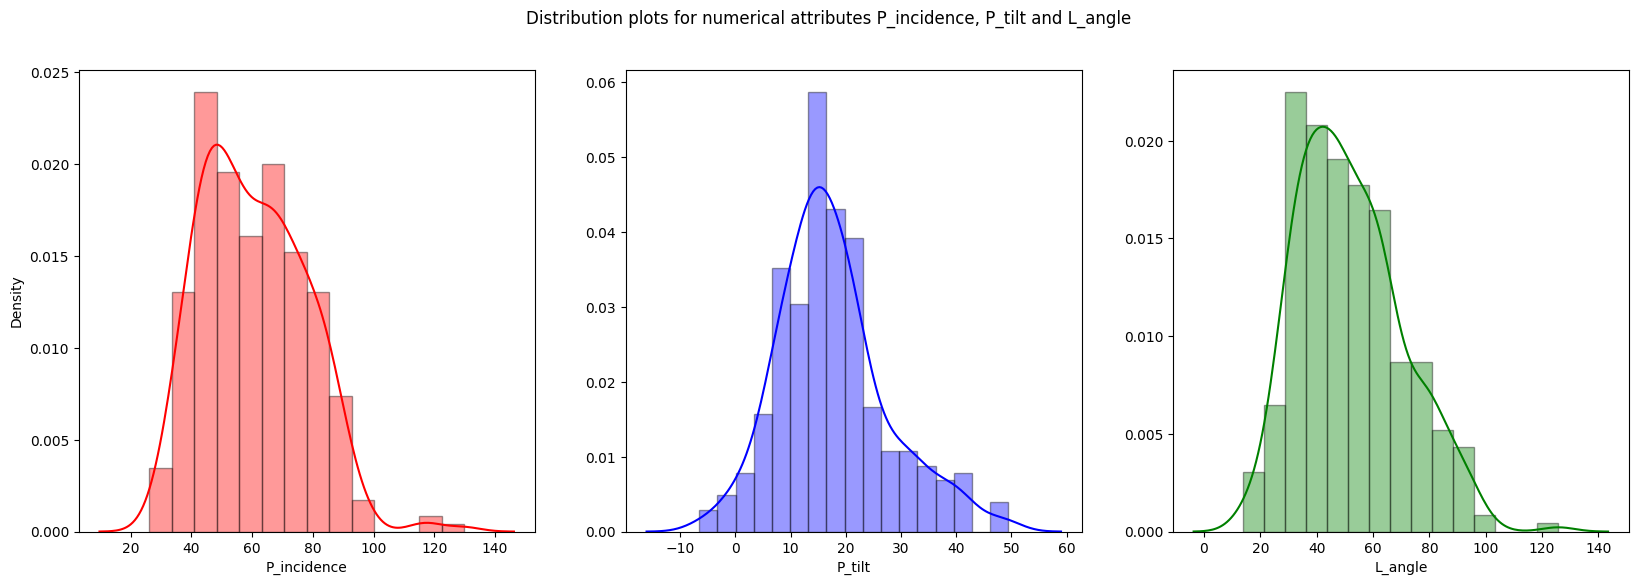

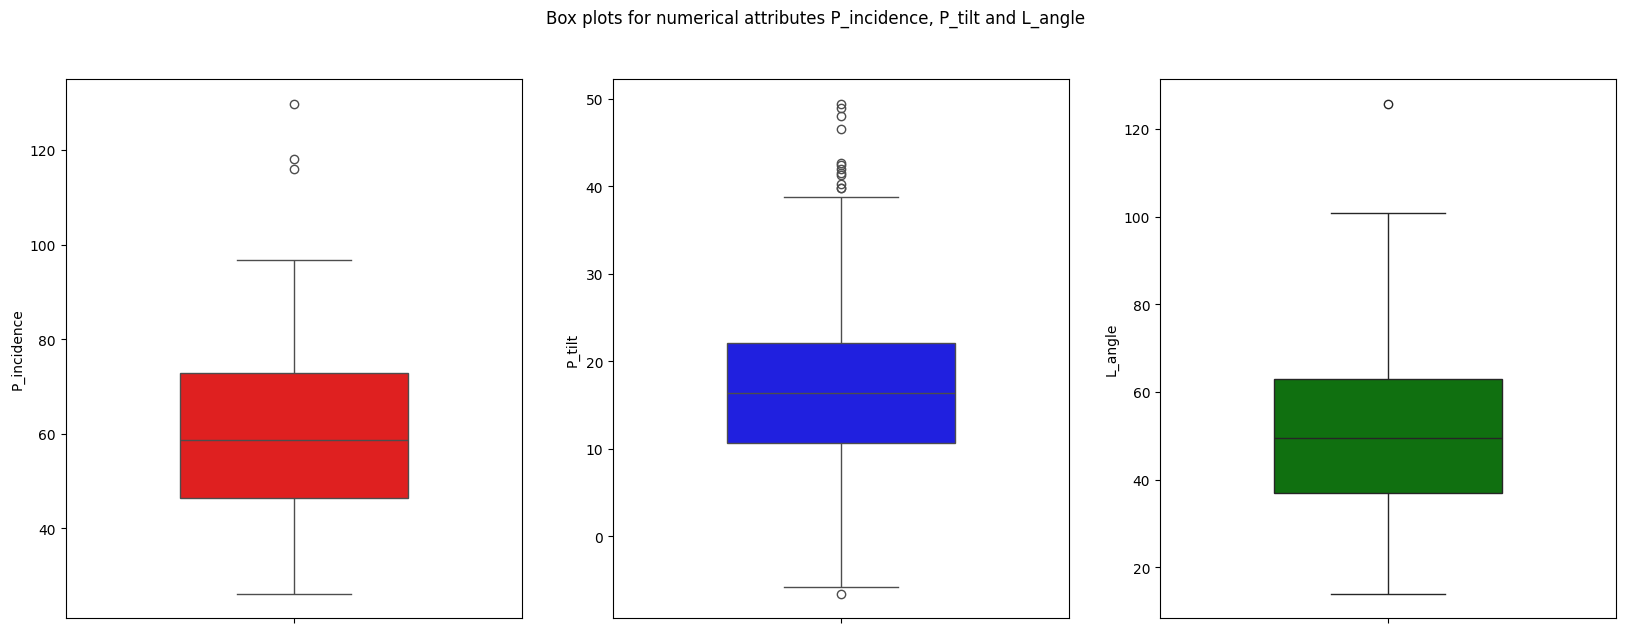

In [ ]:
plt.figure(figsize=(20,6))
plt.margins(y=0.3)
plt.subplot(1,3,1)
sns.distplot(data_main['P_incidence'],color='red')

plt.subplot(1,3,2)
sns.distplot(data_main['P_tilt'],color='blue').set(ylabel=None)

plt.subplot(1,3,3)
sns.distplot(data_main['L_angle'],color = 'green').set(ylabel=None)

plt.suptitle("Distribution plots for numerical attributes P_incidence, P_tilt and L_angle")

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.boxplot(y=data_main['P_incidence'],color='red',width = 0.5)

plt.subplot(1,3,2)
sns.boxplot(y=data_main['P_tilt'],color='blue', width = 0.5)

plt.subplot(1,3,3)
sns.boxplot(y=data_main['L_angle'],color = 'green', width = 0.5)

plt.suptitle("Box plots for numerical attributes P_incidence, P_tilt and L_angle")


**Observations:**

**1. The attribute P_incidence has 3 outliers and most of the values lie below 70.**

**2. The attribute P_tilt has several outliers with one outlier being below the lower whisker. Most of the values lie between 10 and 25. The distribution looks normal.**

**3. The attribute L_angle has 1 outlier and most of the values lie between 40 to 60. The distribution looks normal.**

Text(0.5, 0.98, 'Box plots for numerical attributes S_Slope, P_radius and S_Degree')

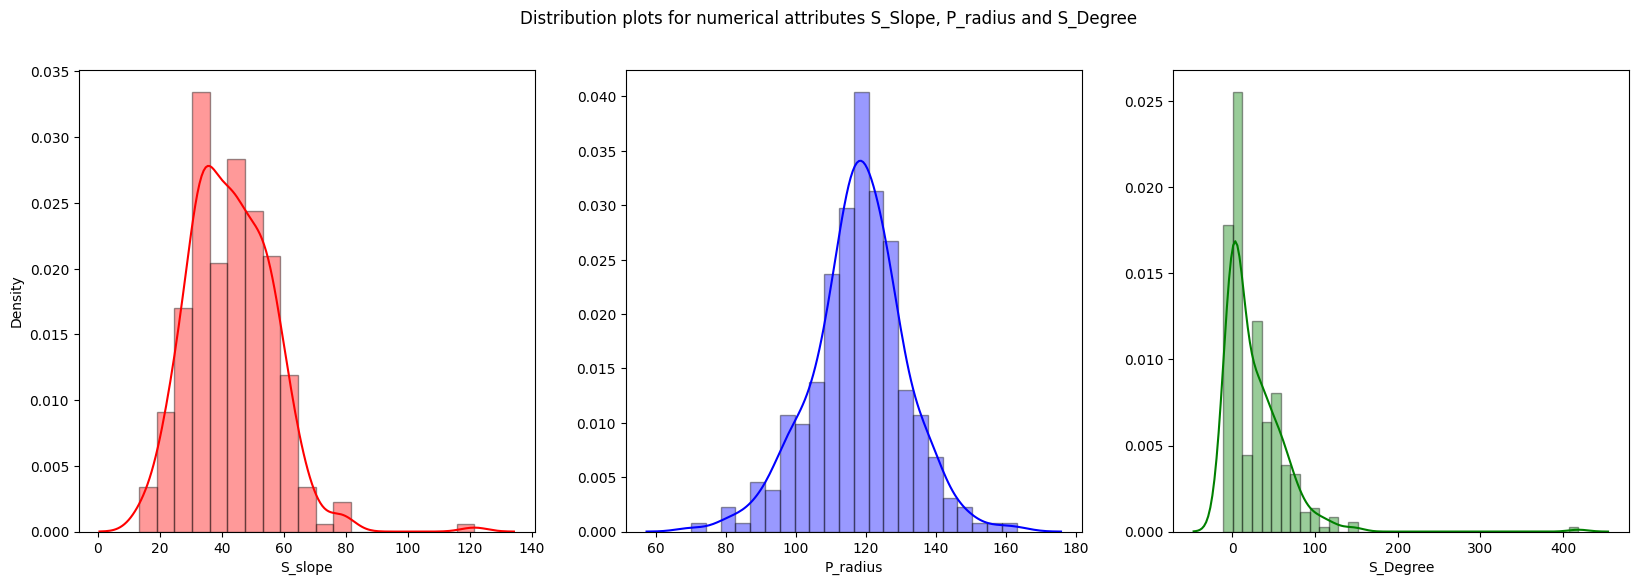

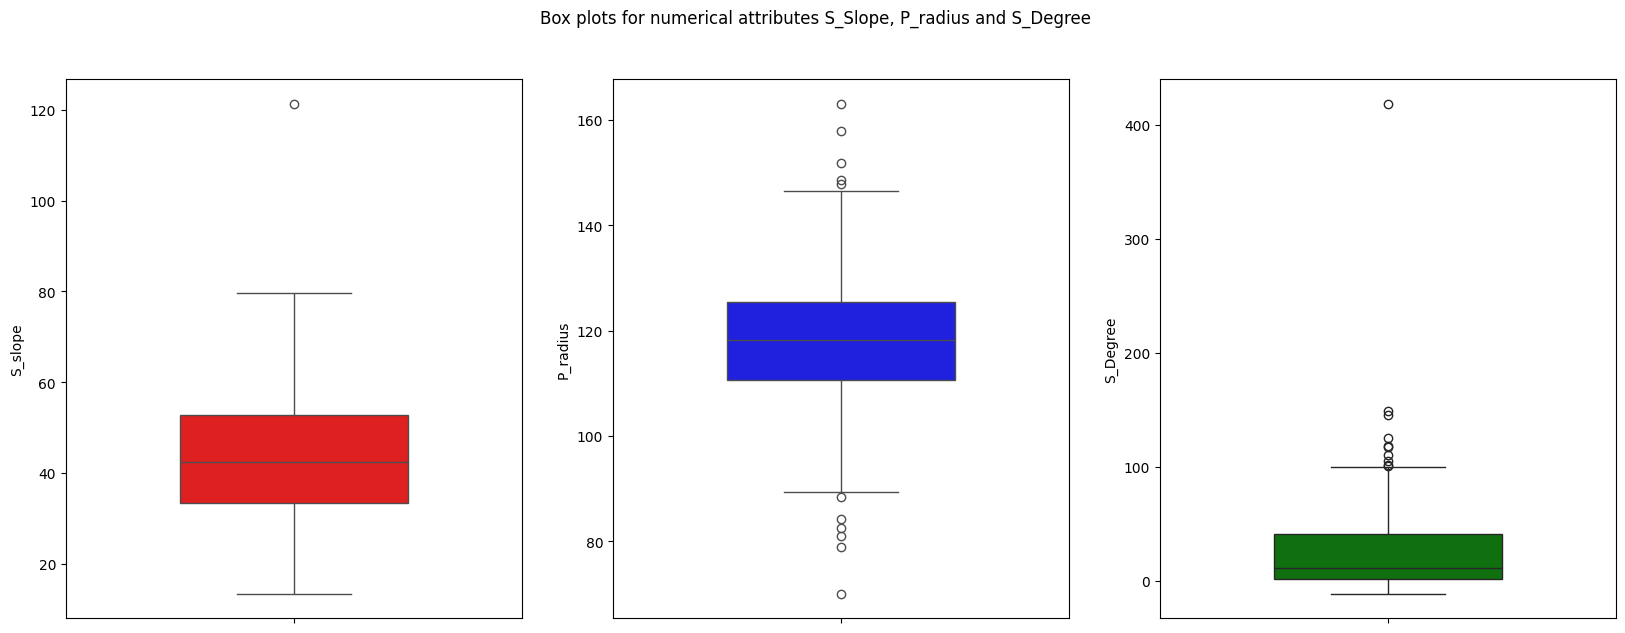

In [ ]:
plt.figure(figsize=(20,6))
plt.margins(y=0.3)
plt.subplot(1,3,1)
sns.distplot(data_main['S_slope'],color='red')

plt.subplot(1,3,2)
sns.distplot(data_main['P_radius'],color='blue').set(ylabel=None)

plt.subplot(1,3,3)
sns.distplot(data_main['S_Degree'],color = 'green').set(ylabel=None)

plt.suptitle("Distribution plots for numerical attributes S_Slope, P_radius and S_Degree")

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.boxplot(y=data_main['S_slope'],color='red',width = 0.5)

plt.subplot(1,3,2)
sns.boxplot(y=data_main['P_radius'],color='blue', width = 0.5)

plt.subplot(1,3,3)
sns.boxplot(y=data_main['S_Degree'],color = 'green', width = 0.5)

plt.suptitle("Box plots for numerical attributes S_Slope, P_radius and S_Degree")


**Observations:**

**1. The attribute S_slope is skewed towards the right with one outlier with most of the data lying below 60.**

**2. The attribute P_radius looks like it follows normal distribution with outliers both beyond upper whisker and below lower whisker.**

**3. The attribute S_Degree is right skewed and has various outliers.**

**Now let us figure out the number of outliers in each column.**

In [ ]:
col_names = ['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
data_no_outliers = data_main.copy(deep=True)  # making a copy of the original dataframe where there will be no outliers
for i in col_names:
    q25,q75=np.percentile(data_main[i],25),np.percentile(data_main[i],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold

    outliers=[j for j in data_main[i] if j < lower or j > upper]
    for k in outliers:
        data_no_outliers.drop(data_no_outliers.index[data_no_outliers[i]==k],inplace=True,axis=0)  # removing outliers in the copied dataframe
    print('Total Number of outliers in the attribute',i,'is',len(outliers))

Total Number of outliers in the attribute P_incidence is 3
Total Number of outliers in the attribute P_tilt is 13
Total Number of outliers in the attribute L_angle is 1
Total Number of outliers in the attribute S_slope is 1
Total Number of outliers in the attribute P_radius is 11
Total Number of outliers in the attribute S_Degree is 10


In [ ]:
print('The shape of the dataset without any outlier is',data_no_outliers.shape)

The shape of the dataset without any outlier is (279, 7)


Text(0.5, 0.98, 'Distribution of Class attribute without outliers')

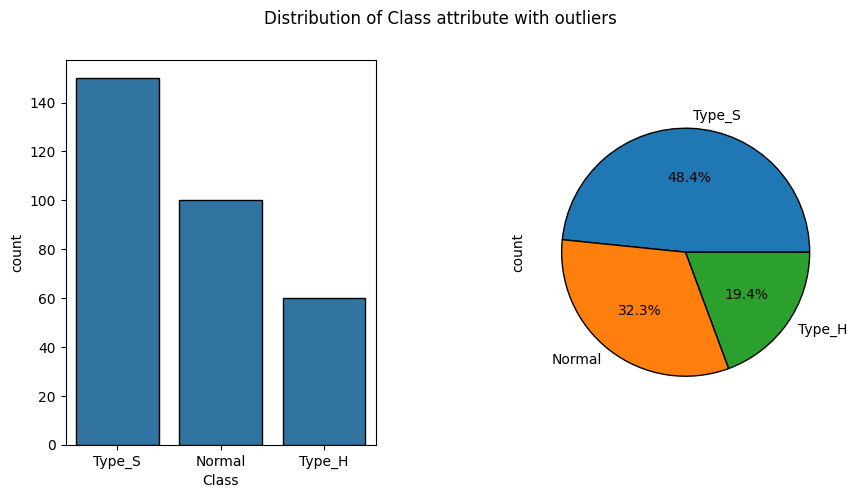

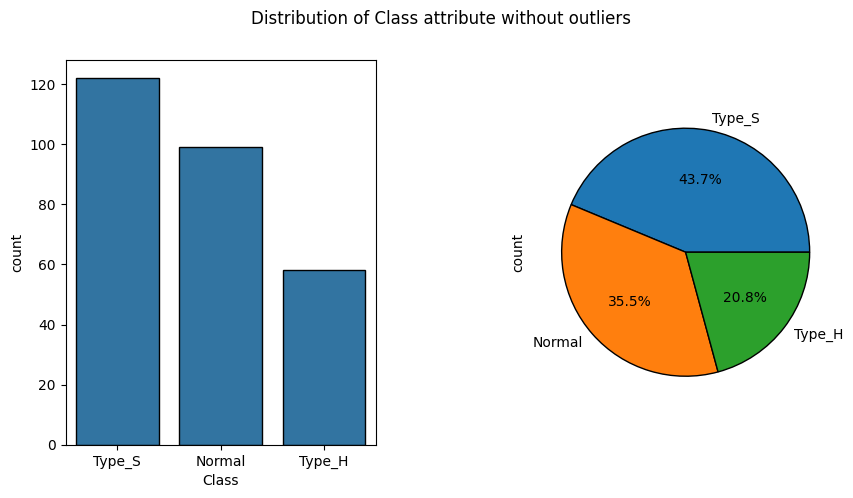

In [ ]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
sns.countplot(x=data_main['Class'],order = data_main['Class'].value_counts().index)

plt.subplot(1,2,2)
data_main['Class'].value_counts().plot.pie(autopct='%1.1f%%')

plt.suptitle('Distribution of Class attribute with outliers')

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
sns.countplot(x=data_no_outliers['Class'],order = data_no_outliers['Class'].value_counts().index)

plt.subplot(1,2,2)
data_no_outliers['Class'].value_counts().plot.pie(autopct='%1.1f%%')

plt.suptitle('Distribution of Class attribute without outliers')


**Observations:**

**1. With Outliers: Type_S has the highest Class attribute values, a total of 48.4% , followed by Normal (32.3%) and then Type_H (19.4%).**

**2. Without Outliers: Type_S has the highest Class attribute values, a total of 43.7% , followed by Normal (35.5%) and then Type_H (20.8%).**

**3. There is imbalance in the Class attribute, both with outliers and without it.**

## 3.2. Bivariate analysis

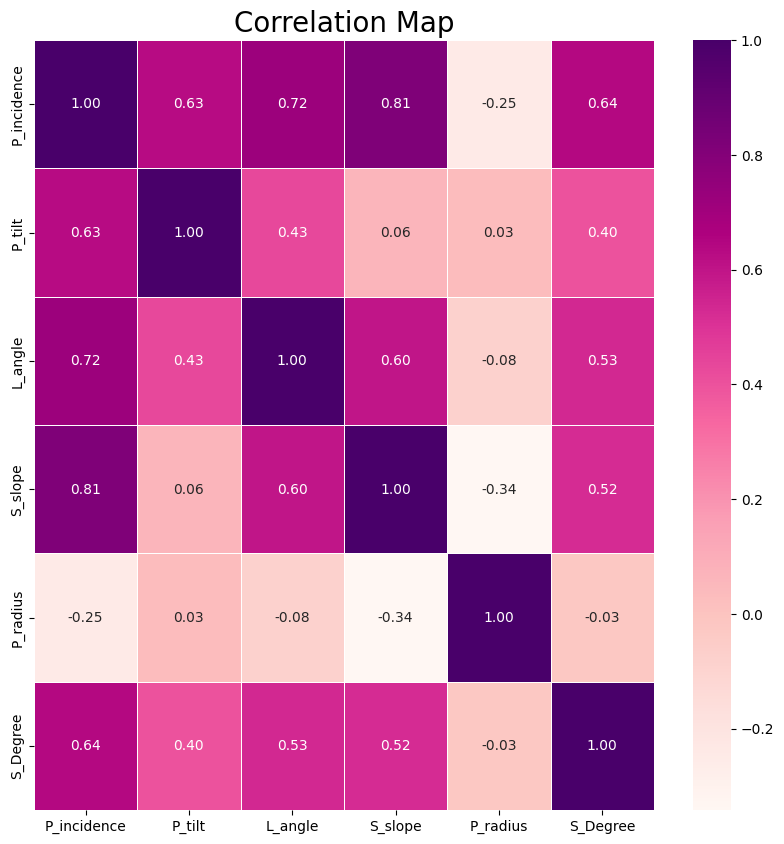

In [ ]:
# correlation map
# doing analysis including the outliers
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data_main[['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']].corr(), annot=True, linewidth=".5", cmap="RdPu", fmt=".2f", ax = ax)
plt.title("Correlation Map",fontsize=20)
plt.show()

**Observations:**

**1. P_incidence has good positive correlation with P_tilt(0.63), L_angle(0.72), S_slope(0.81) and S_degree(0.64) but a low negative correlation with P-radius(-0.25).**

**2. P_tilt has good positive correlation with P_incidence(0.63), low positive correlation with L_angle (0.43) and S_Degree(0.40) but almost no correlation at all with S_slope(0.06) and P_radius(0.03).**

**3. L_angle has good positive correlation with P_incidence(0.72), S_slope(0.60) and S_Degree(0.53), low positive correlation with P_tilt(0.43) but almost no correlation with P_radius (-0.08).**

**4. S_slope has good correlation with P_incidence(0.81), L_angle(0.60) and S_degree(0.52), low negative correlation with P_radius(-0.34) and almost no correlation with P_tilt(0.06).**

**5. P_radius has low negative correlation with P_incidence(-0.25), S_slope(-0.34) and almost no correlation with P_tilt(0.03), L_angle(-0.08) and S_degree(-0.03).**

**6. S_Degree has good positive correlation with P_incidence(0.64), P_tilt(0.40), L_angle(0.53), S_slope(0.52) and almost no correlation with P_radius (-0.03).**

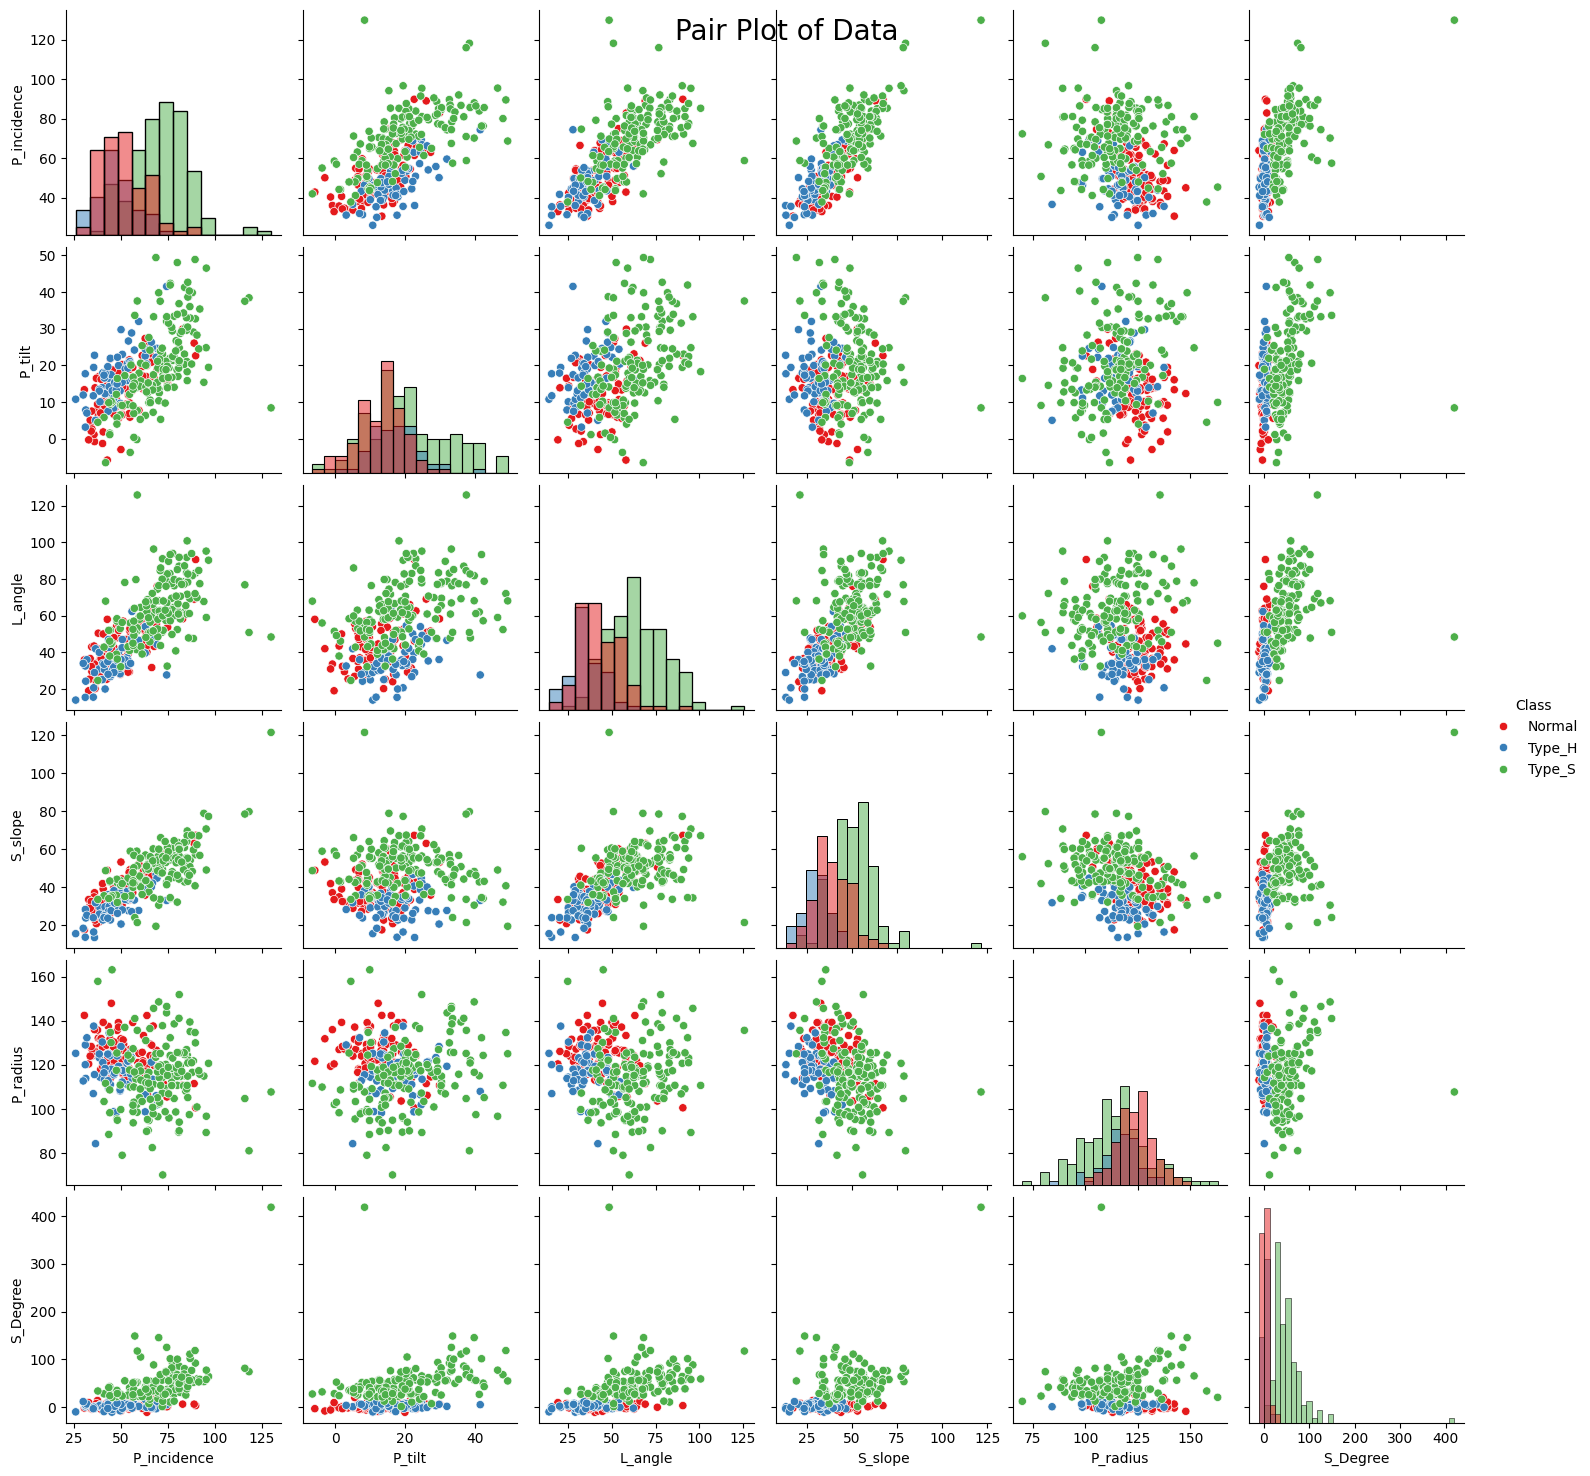

In [ ]:
# doing pairplot including the outliers
sns.pairplot(data=data_main,hue="Class",palette="Set1",diag_kind='hist')
plt.suptitle("Pair Plot of Data",fontsize=20)
plt.show()   # pairplot without standard deviaton fields of data

**Observations:**

**1. People with high values of P_incidence, P_tilt, L_angle, S_slope and S_Degree fall under Type_S kind of Class.**

**2. Normal and Type_H kind of class have most of the data overlapping.**

# Domain 2: Banking and Finance

# 1. Importing data

In [ ]:
data1 = pd.read_csv('/content/drive/My Drive/Corizo/Class 5 15052024/Part2 - Data1.csv')
data2 = pd.read_csv('/content/drive/My Drive/Corizo/Class 5 15052024/Part2 -Data2.csv')

In [ ]:
print("The size and shape of the first dataset is",data1.size,'and',data1.shape,'respectively.')
print("The size and shape of the second dataset is",data2.size,'and',data2.shape,'respectively.')

The size and shape of the first dataset is 40000 and (5000, 8) respectively.
The size and shape of the second dataset is 35000 and (5000, 7) respectively.


In [ ]:
data1.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2

In [ ]:
data2.head()

ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

Since 'ID' is the common attribute between the two datasets, I merged the two datasets on 'ID'.

In [ ]:
data_concat = data1.merge(data2, on='ID')
#data_concat.drop(['ID'],axis=1,inplace=True)

In [ ]:
data_concat.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN

In [ ]:
print("The size and shape of the final dataset is",data_concat.size,'and',data_concat.shape,'respectively.')

The size and shape of the final dataset is 70000 and (5000, 14) respectively.


In [ ]:
data_concat.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN

By closely observing the data and description given about each column attribute, it can be said that:

1. <b>Numeric data columns (Interval or Ratio) are</b>: Age, CustomerSince, HighestSpend, MonthlyAverageSpend, Mortgage, ZipCode     

2. <b>Ordinal Categorical columns are</b>: HiddenScore, Level

3. <b>Nominal Categorical columns are</b>: ID, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard.

# 2. Data cleansing

In [ ]:
data_concat.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

There are two attributes namely, <b>MonthlyAverageSpend</b> and <b>LoanOnCard</b>, which belong to the data type <b>float 64</b>. Rest of the attributes are of the type <b>int 64</b>. The datatypes look correct as all the data entries are numeric in nature and hence they are either int64 or float64.

In [ ]:
data_concat.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN

<b>Note that the ID column is of no use in building the model. Hence, it can be dropped.</b>

In [ ]:
data_concat.drop('ID',axis=1,inplace=True)

In [ ]:
data_concat.head()

Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   25              1            49    91107            4   
1   45             19            34    90089            3   
2   39             15            11    94720            1   
3   35              9           100    94112            1   
4   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN

In [ ]:
data_concat.isnull().sum()

Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [ ]:
data_concat['LoanOnCard'].value_counts(dropna=False)

LoanOnCard
0.0    4500
1.0     480
NaN      20
Name: count, dtype: int64

<b>Since the number of '0's in the attribute LoanOnCard are far more than '1's, I filled the NaN values with the mode(0).</b>

In [ ]:
data_concat['LoanOnCard'].fillna(value=0,inplace=True)
print("The total NaN values in the dataframe are",data_concat.isnull().sum().sum())
print("The final shape of the dataframe after data cleansing is",data_concat.shape)

The total NaN values in the dataframe are 0
The final shape of the dataframe after data cleansing is (5000, 13)


In [ ]:
data_concat.describe()

Age  CustomerSince  HighestSpend       ZipCode  HiddenScore  \
count  5000.000000    5000.000000   5000.000000   5000.000000  5000.000000   
mean     45.338400      20.104600     73.774200  93152.503000     2.396400   
std      11.463166      11.467954     46.033729   2121.852197     1.147663   
min      23.000000      -3.000000      8.000000   9307.000000     1.000000   
25%      35.000000      10.000000     39.000000  91911.000000     1.000000   
50%      45.000000      20.000000     64.000000  93437.000000     2.000000   
75%      55.000000      30.000000     98.000000  94608.000000     3.000000   
max      67.000000      43.000000    224.000000  96651.000000     4.000000   

       MonthlyAverageSpend        Level     Mortgage     Security  \
count          5000.000000  5000.000000  5000.000000  5000.000000   
mean              1.937938     1.881000    56.498800     0.104400   
std               1.747659     0.839869   101.713802     0.305809   
min               0.000000     1.000000     0.000000     0.000000   
25%               0.700000     1.000000     0.000000     0.000000   
50%               1.500000     2.000000     0.000000     0.000000   
75%               2.500000     3.000000   101.000000     0.000000   
max              10.000000     3.000000   635.000000     1.000000   

       FixedDepositAccount  InternetBanking   CreditCard   LoanOnCard  
count           5000.00000      5000.000000  5000.000000  5000.000000  
mean               0.06040         0.596800     0.294000     0.096000  
std                0.23825         0.490589     0.455637     0.294621  
min                0.00000         0.000000     0.000000     0.000000  
25%                0.00000         0.000000     0.000000     0.000000  
50%                0.00000         1.000000     0.000000     0.000000  
75%                0.00000         1.000000     1.000000     0.000000  
max                1.00000         1.000000     1.000000     1.000000

In [ ]:
data_concat[data_concat['CustomerSince']<0].shape[0]

52

In [ ]:
data_concat[data_concat['CustomerSince']<0]['CustomerSince'].value_counts()

CustomerSince
-1    33
-2    15
-3     4
Name: count, dtype: int64

<b>There are 52 negative entries in the CustomerSince column.</b>

There there unique negative entries -1,-2 and -3 in the CustomerSince column.

**Let us clean the CustomerSince column by removing the negative entries with appropriate values**

In order to get the appropriate values, let take a cue from correlation of CustomerSince attribute with other attributes

In [ ]:
data_concat.corr()

Age  CustomerSince  HighestSpend   ZipCode  \
Age                  1.000000       0.994215     -0.055269 -0.029216   
CustomerSince        0.994215       1.000000     -0.046574 -0.028626   
HighestSpend        -0.055269      -0.046574      1.000000 -0.016410   
ZipCode             -0.029216      -0.028626     -0.016410  1.000000   
HiddenScore         -0.046418      -0.052563     -0.157501  0.011778   
MonthlyAverageSpend -0.052012      -0.050077      0.645984 -0.004061   
Level                0.041334       0.013152     -0.187524 -0.017377   
Mortgage            -0.012539      -0.010582      0.206806  0.007383   
Security            -0.000436      -0.001232     -0.002616  0.004704   
FixedDepositAccount  0.008043       0.010353      0.169738  0.019972   
InternetBanking      0.013702       0.013898      0.014206  0.016990   
CreditCard           0.007681       0.008967     -0.002385  0.007691   
LoanOnCard          -0.007726      -0.007413      0.502462  0.000107   

                     HiddenScore  MonthlyAverageSpend     Level  Mortgage  \
Age                    -0.046418            -0.052012  0.041334 -0.012539   
CustomerSince          -0.052563            -0.050077  0.013152 -0.010582   
HighestSpend           -0.157501             0.645984 -0.187524  0.206806   
ZipCode                 0.011778            -0.004061 -0.017377  0.007383   
HiddenScore             1.000000            -0.109275  0.064929 -0.020445   
MonthlyAverageSpend    -0.109275             1.000000 -0.136124  0.109905   
Level                   0.064929            -0.136124  1.000000 -0.033327   
Mortgage               -0.020445             0.109905 -0.033327  1.000000   
Security                0.019994             0.015086 -0.010812 -0.005411   
FixedDepositAccount     0.014110             0.136534  0.013934  0.089311   
InternetBanking         0.010354            -0.003611 -0.015004 -0.005995   
CreditCard              0.011588            -0.006689 -0.011014 -0.007231   
LoanOnCard              0.061367             0.366889  0.136722  0.142095   

                     Security  FixedDepositAccount  InternetBanking  \
Age                 -0.000436             0.008043         0.013702   
CustomerSince       -0.001232             0.010353         0.013898   
HighestSpend        -0.002616             0.169738         0.014206   
ZipCode              0.004704             0.019972         0.016990   
HiddenScore          0.019994             0.014110         0.010354   
MonthlyAverageSpend  0.015086             0.136534        -0.003611   
Level               -0.010812             0.013934        -0.015004   
Mortgage            -0.005411             0.089311        -0.005995   
Security             1.000000             0.317034         0.012627   
FixedDepositAccount  0.317034             1.000000         0.175880   
InternetBanking      0.012627             0.175880         1.000000   
CreditCard          -0.015028             0.278644         0.004210   
LoanOnCard           0.021954             0.316355         0.006278   

                     CreditCard  LoanOnCard  
Age                    0.007681   -0.007726  
CustomerSince          0.008967   -0.007413  
HighestSpend          -0.002385    0.502462  
ZipCode                0.007691    0.000107  
HiddenScore            0.011588    0.061367  
MonthlyAverageSpend   -0.006689    0.366889  
Level                 -0.011014    0.136722  
Mortgage              -0.007231    0.142095  
Security              -0.015028    0.021954  
FixedDepositAccount    0.278644    0.316355  
InternetBanking        0.004210    0.006278  
CreditCard             1.000000    0.002802  
LoanOnCard             0.002802    1.000000

<Axes: >

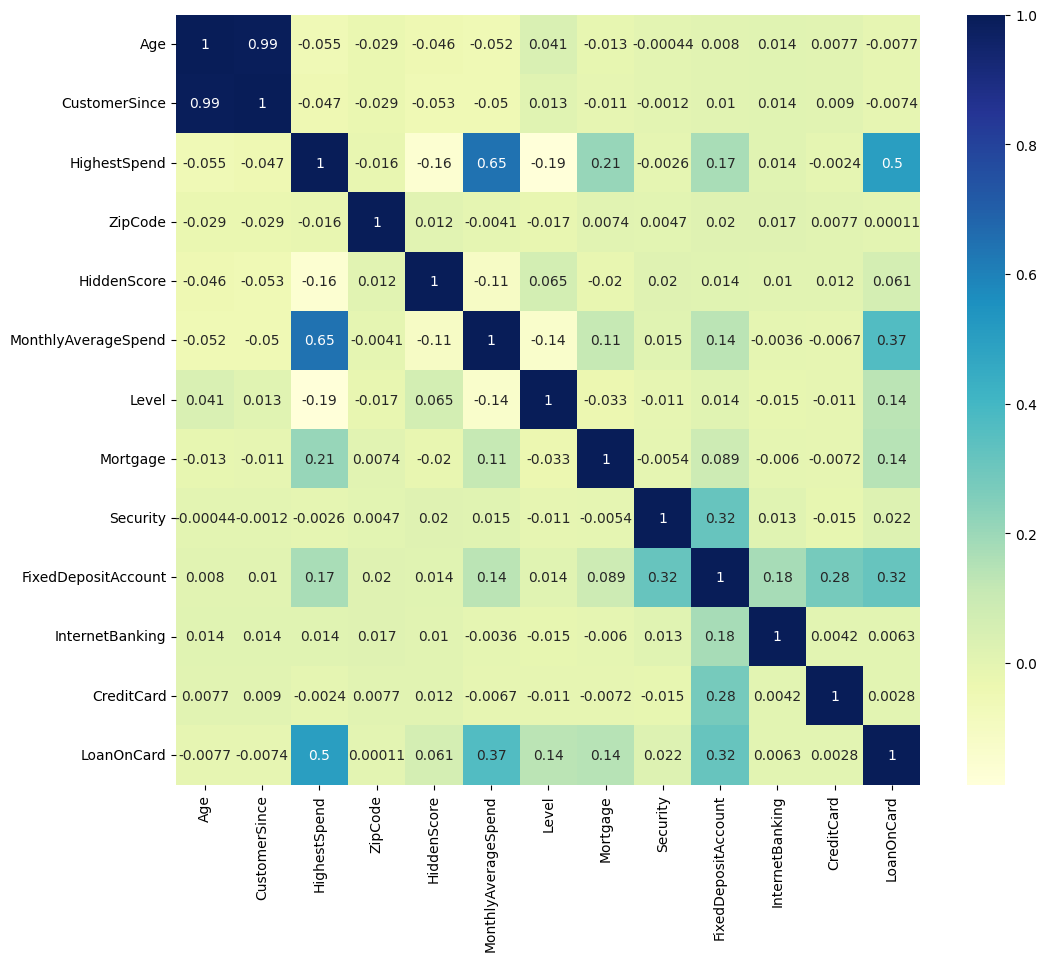

In [ ]:
# Above table represented more elegently using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data_concat.corr(),cmap='YlGnBu',annot=True)

**Observations:**

**1. Age and CustomerSince attributes are highly correlated (0.99).**

**2. MonthlyAverageSpend has good correlation with HighestSpend(0.65) which is quite intuitive.**

**3. LoanOnCard attribute has good correlation with HighestSpend, MonthlyAverageSpend and FixedDepositAccount but almost close to 0 correlation with other attributes.**

In [ ]:
# Let us find the unique ages which have -1, -2 and -3 entries in the CustomerSince column
val_cal = data_concat[data_concat['CustomerSince'] == -1]['Age'].value_counts()
print(val_cal)

Age
25    17
24     6
23     6
29     3
26     1
Name: count, dtype: int64


In [ ]:
# We will find the mean of positive CustomerSince values for the ages corresponding to negative values and use it to replace all the CustomerSince entries
# having negative value

k=[-1,-2,-3]
for j in k:
    list3 = data_concat[data_concat['CustomerSince'] == j]['Age'].value_counts().index.tolist()  # contains list of ages where customersince = -1
    list4 = data_concat[data_concat['CustomerSince'] == j]['CustomerSince'].index.tolist()  # contains index locations where customersince = -1
    for i in list4:
        data_concat.loc[i,'CustomerSince'] = data_concat[(data_concat['Age'].isin(list3)) & (data_concat['CustomerSince'] > 0)]['CustomerSince'].mean()

In [ ]:
data_concat['CustomerSince'].describe()

count    5000.000000
mean       20.149833
std        11.391004
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: CustomerSince, dtype: float64

#### As it can be seen that the minimum value for the attribute CustomerSince is no more negative. The dataset is now clean to work with.

# 3. Data analysis and visualization

## a. Univariate Analysis

<Axes: ylabel='Mortgage'>

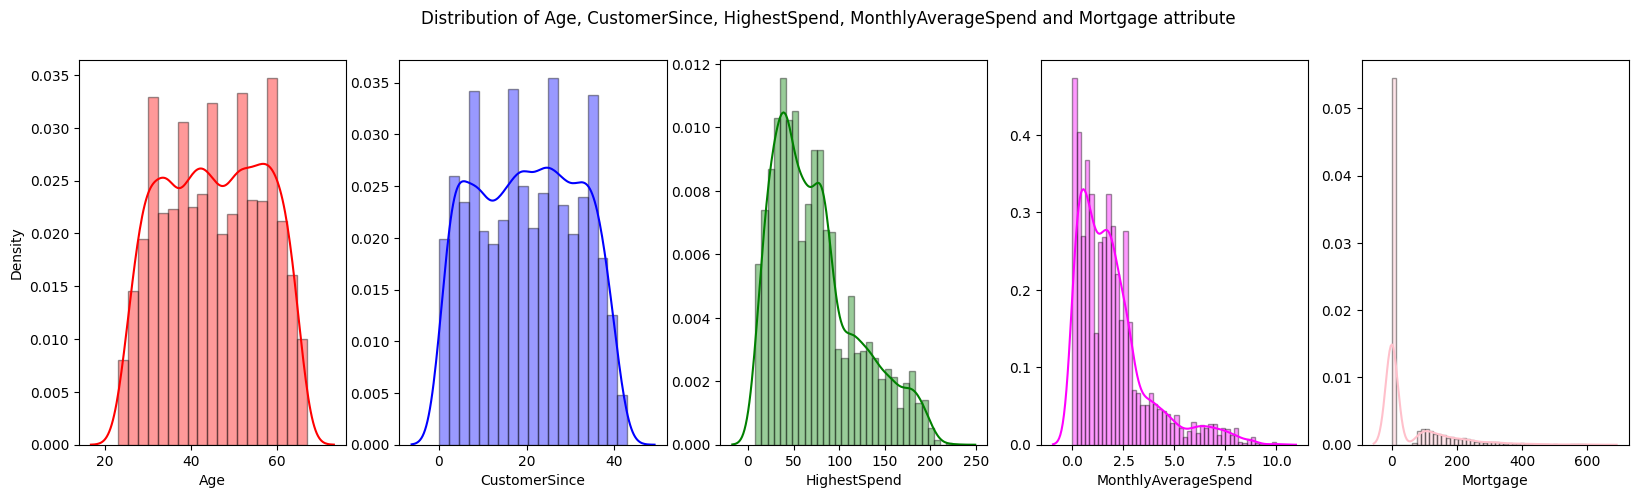

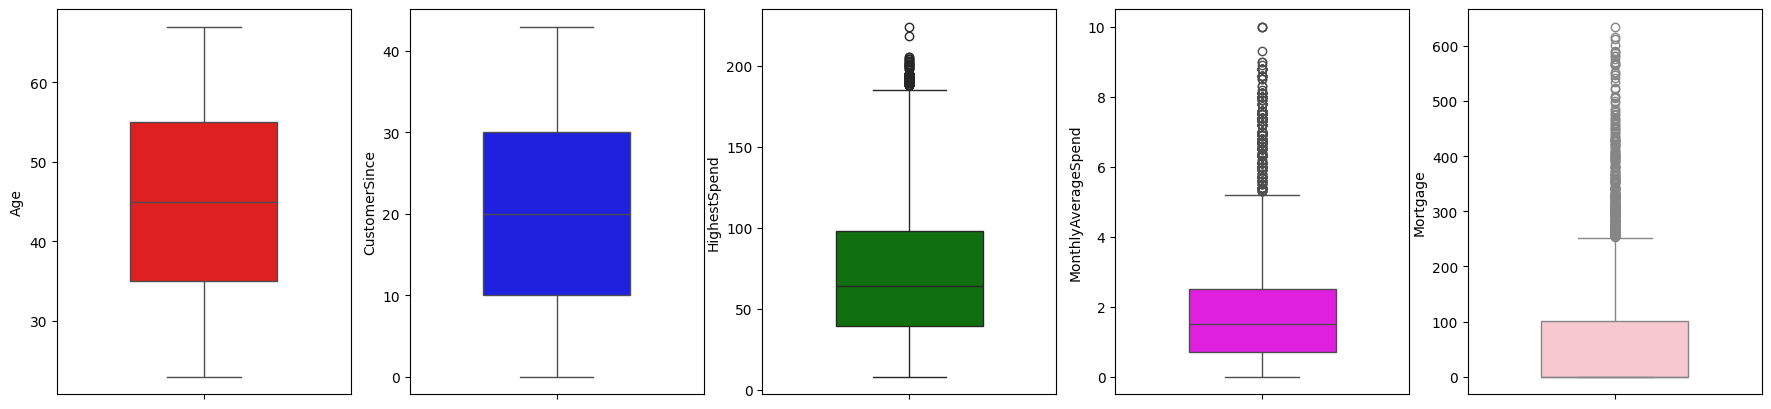

In [ ]:
#Age, CustomerSince, HighestSpend, MonthlyAverageSpend, Mortgage

plt.figure(figsize=(20,5))
plt.margins(y=0.3)
plt.subplot(1,5,1)
sns.distplot(data_concat['Age'],color='red')

plt.subplot(1,5,2)
sns.distplot(data_concat['CustomerSince'],color='blue').set(ylabel=None)

plt.subplot(1,5,3)
sns.distplot(data_concat['HighestSpend'],color = 'green').set(ylabel=None)

plt.subplot(1,5,4)
sns.distplot(data_concat['MonthlyAverageSpend'],color = 'magenta').set(ylabel=None)

plt.subplot(1,5,5)
sns.distplot(data_concat['Mortgage'],color = 'pink').set(ylabel=None)

plt.suptitle('Distribution of Age, CustomerSince, HighestSpend, MonthlyAverageSpend and Mortgage attribute')

plt.figure(figsize=(22,5))
plt.subplot(1,5,1)
sns.boxplot(y=data_concat['Age'],color='red',width = 0.5)

plt.subplot(1,5,2)
sns.boxplot(y=data_concat['CustomerSince'],color='blue', width = 0.5)

plt.subplot(1,5,3)
sns.boxplot(y=data_concat['HighestSpend'],color = 'green', width = 0.5)

plt.subplot(1,5,4)
sns.boxplot(y=data_concat['MonthlyAverageSpend'],color = 'magenta', width = 0.5)

plt.subplot(1,5,5)
sns.boxplot(y=data_concat['Mortgage'],color = 'pink', width = 0.5)

**Observations:**

1. The <b>Age</b> attribute has no outlier and most of the customers have ages between 35 to 55.
2. The <b>CustomerSince</b> attribute has no outlier and most of the customers are with the bank since 10 to 30 years.
3. The <b>HighestSpend attribute</b> is right skewed with some outliers (customers with highest spend more than 180 units) with most of the HighestSpend lying between 50 to 100 units.
4. The <b>MonthlyAverageSpend</b> is right skewed with a lot of  outliers (customers with monthly average spend more than 5 units) with most of the Monthly average spend lying below 3.
5. The <b>Mortgage</b> attribute is skewed towards the right because of many customers who have 0 Mortgage which shifts the distribution towards right. This brings in a lot of outliers. Also note that there is no lower whisker for the attribute which means that at least 25% of the observed values are 0, so the lower quartile is also 0.

The unique values in the attribute ZipCode are  467


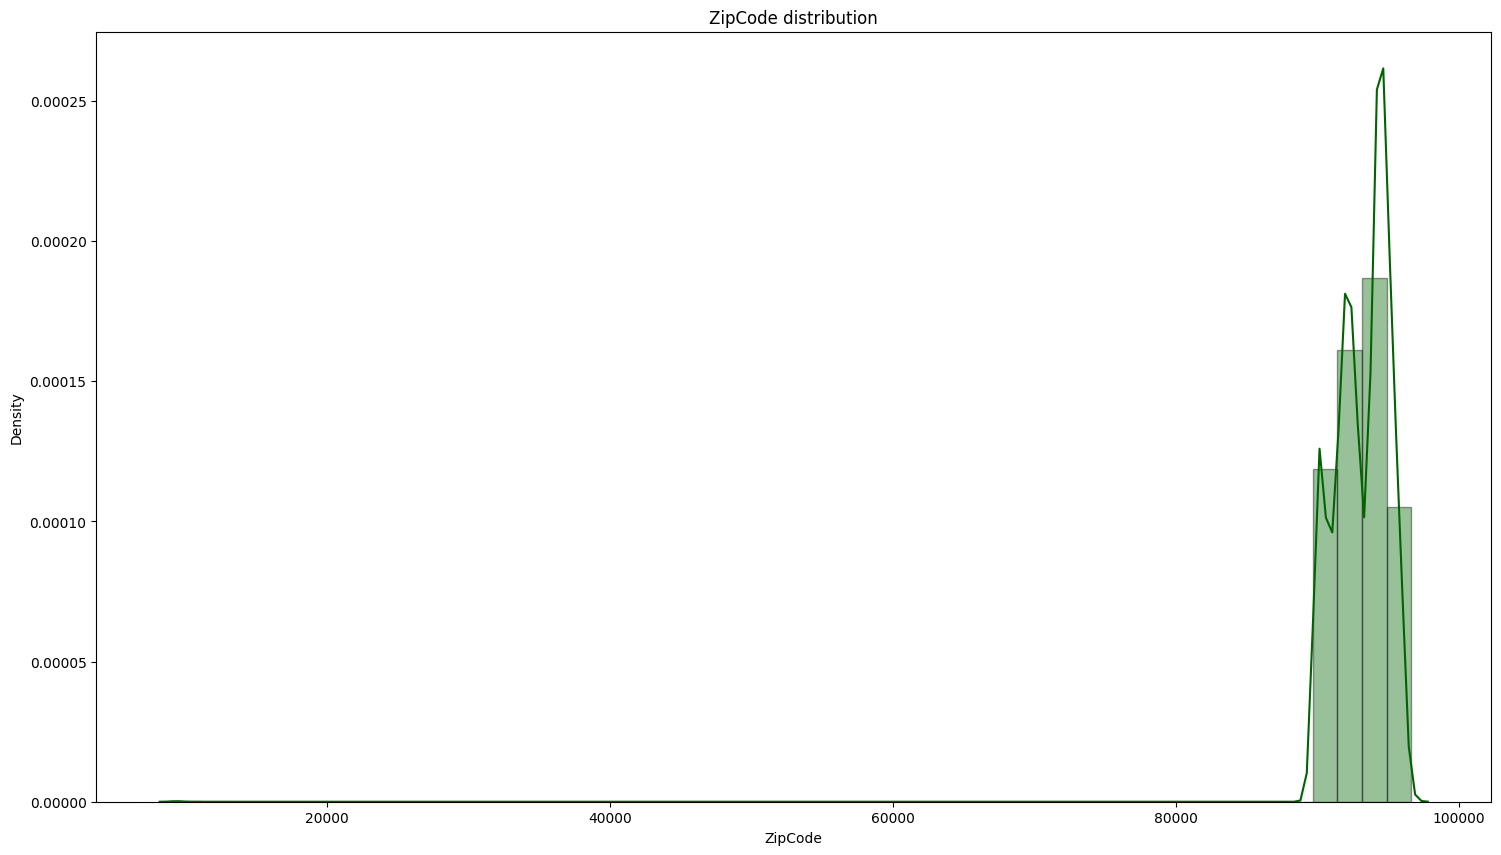

In [ ]:
# Since it is a ordinal categorical variable, we will use countplot
plt.figure(figsize=(18,10))
sns.distplot(data_concat['ZipCode'],color='darkgreen').set(title='ZipCode distribution')
print("The unique values in the attribute ZipCode are ",data_concat['ZipCode'].nunique())

**There are 467 unique values in the attribute ZipCode and follows the distribution as shown above. ZipCode is not an important feature as can be seen from its distribution and hence can be removed from the dataset.**

In [ ]:
data_concat.drop('ZipCode',axis=1,inplace=True)

<Axes: ylabel='count'>

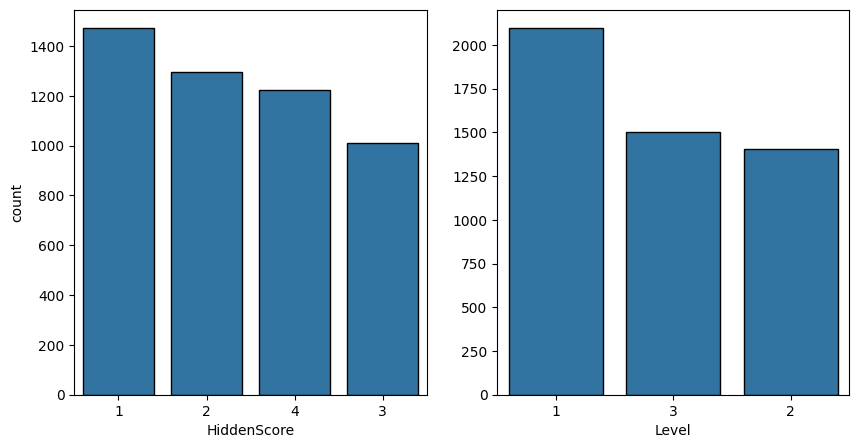

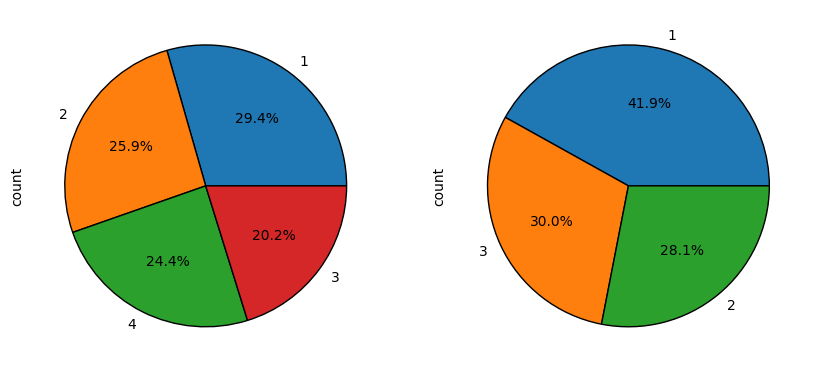

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data = data_concat, x= 'HiddenScore', order = data_concat['HiddenScore'].value_counts().index)

plt.subplot(1,2,2)
sns.countplot(data = data_concat, x= 'Level',order = data_concat['Level'].value_counts().index).set(ylabel=None)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
data_concat['HiddenScore'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(1,2,2)
data_concat['Level'].value_counts().plot.pie(autopct='%1.1f%%')

**Observations:**

1. The <b>HiddenScore</b> attribute shows nearly equal distribution of categories  2 and 4 (close to 25%) with customers having HiddenScore 1 being the most (30%) and customers with HiddenScore of 4 being the least (20%).
2. The <b>Level</b> attribute has more Level 1 (42%) customers than Level 2 and 3 which have nearly equal distributions(close to 30%).

<Axes: ylabel='count'>

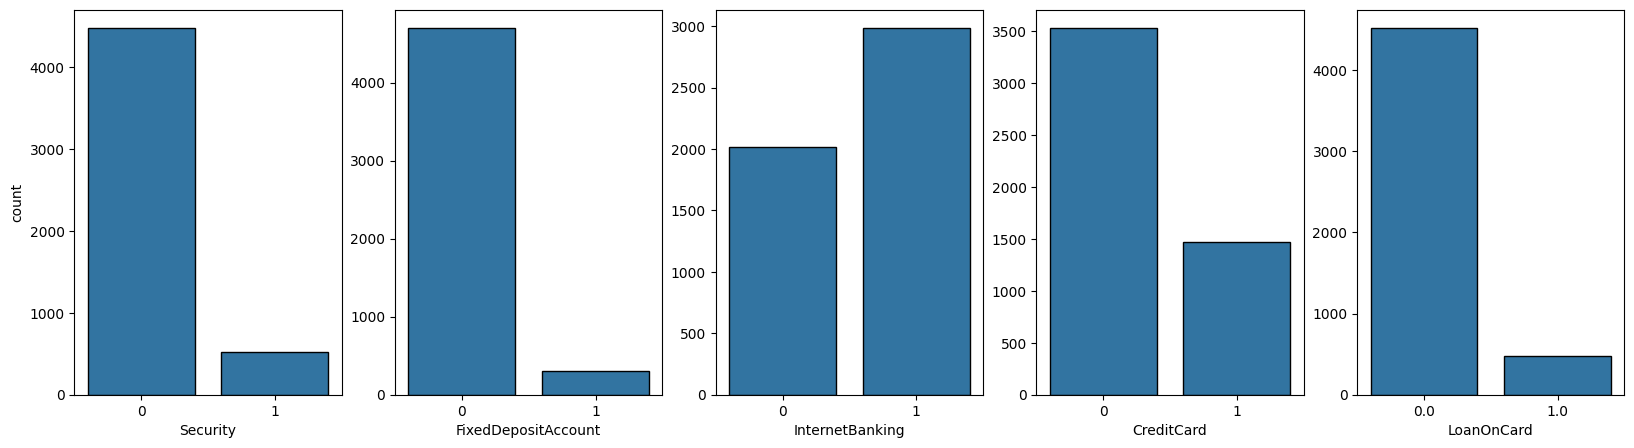

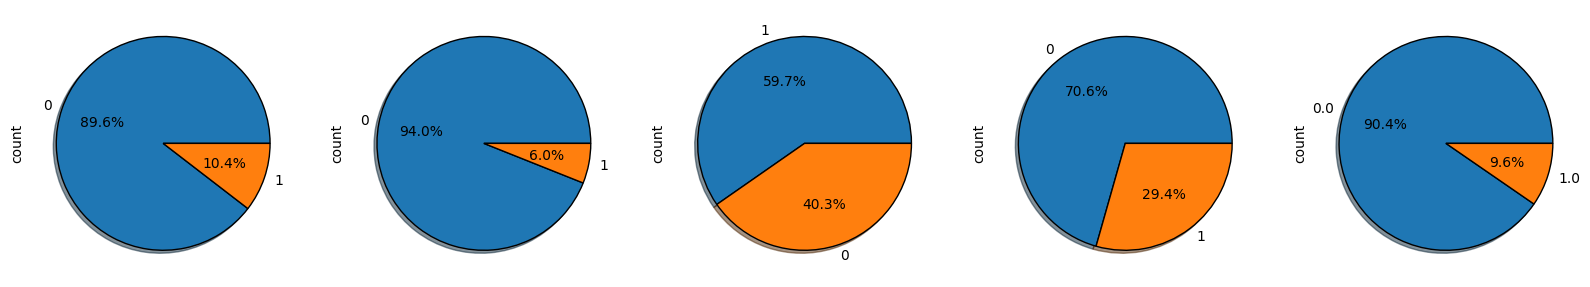

In [ ]:
#HiddenScore, Level, ID, ZipCode, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard.

plt.figure(figsize=(20,5))
plt.margins(y=0.3)

plt.subplot(1,5,1)
sns.countplot(data = data_concat, x='Security')

plt.subplot(1,5,2)
sns.countplot(data = data_concat, x= 'FixedDepositAccount').set(ylabel=None)

plt.subplot(1,5,3)
sns.countplot(data = data_concat, x= 'InternetBanking').set(ylabel=None)

plt.subplot(1,5,4)
sns.countplot(data = data_concat, x='CreditCard').set(ylabel=None)

plt.subplot(1,5,5)
sns.countplot(data = data_concat, x='LoanOnCard').set(ylabel=None)

plt.figure(figsize=(20,5))
plt.margins(y=0.3)

plt.subplot(1,5,1)
data_concat['Security'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

plt.subplot(1,5,2)
data_concat['FixedDepositAccount'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

plt.subplot(1,5,3)
data_concat['InternetBanking'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

plt.subplot(1,5,4)
data_concat['CreditCard'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

plt.subplot(1,5,5)
data_concat['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

**Observations:**

1. A very high number of customers (90%) do not have <b>Security</b> asset with the bank.
2. A very high number of customets (94%) do not have <b>FixedDepositAccount</b> with the bank.
3. Almost 60% of customers use <b>InternetBanking</b>.
4. A high number of customers (71%) do not use <b>CreditCard</b>.
5. A very high number of customers (90%) do not have <b>LoanOnCard</b>.



## b. Bivariate analysis

<u>1. Analyzing the Age attribute</u>

Text(0.5, 1.0, 'Distribution of Age attribute with customer division based on Loan')

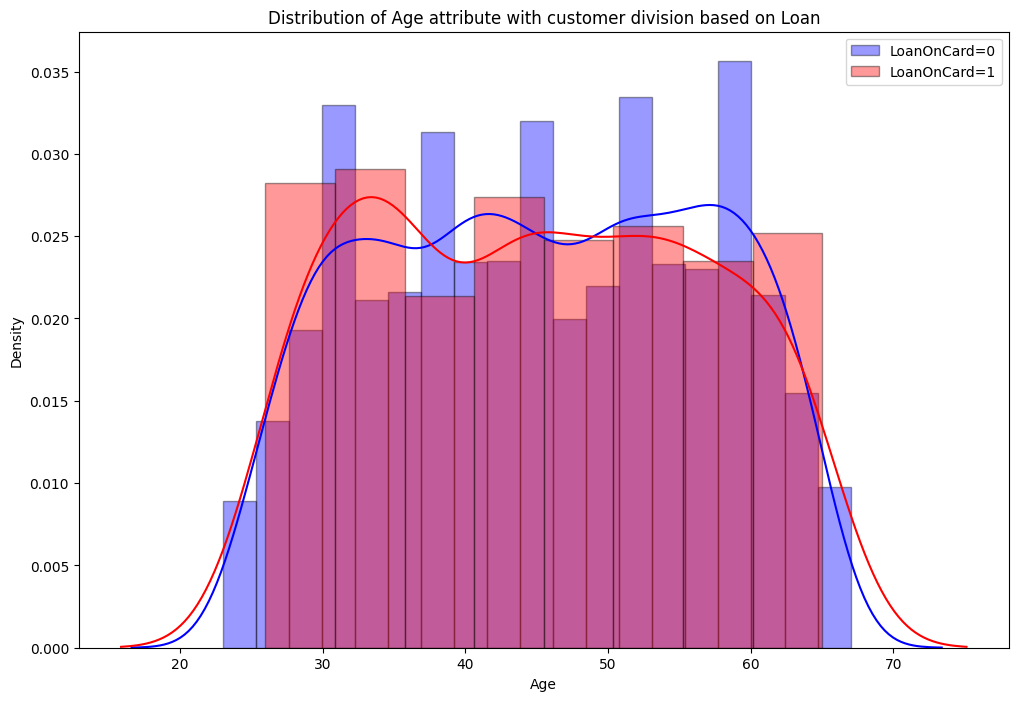

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(data_concat[data_concat['LoanOnCard'] == 0]['Age'],kde=True, color='b', label='LoanOnCard=0')
sns.distplot(data_concat[data_concat['LoanOnCard'] == 1]['Age'],kde=True, color='r',label='LoanOnCard=1')
plt.legend()
plt.title("Distribution of Age attribute with customer division based on Loan")

In [ ]:
age_cut = pd.cut(data_concat['Age'],bins=[20,30,40,50,60])
pd.crosstab(age_cut,data_concat['LoanOnCard']).apply(lambda r: r/r.sum()*100, axis=1)

LoanOnCard        0.0        1.0
Age                             
(20, 30]    89.423077  10.576923
(30, 40]    90.453074   9.546926
(40, 50]    90.393701   9.606299
(50, 60]    91.307634   8.692366

**Observations :**

**1. From above table as well as distribution plot of Age attribute, one can observe that most of the customers lie in the age group of 30 to 60.**

**2. Also,one can observe that 10.5% of the total customers in age group 20-30 have bought LoanOnCard from the bank, while in age groups (30-40), (40-50), there is a conversion rate of around 9.5% and in age group (50-60), there is a conversion rate of 8.7%.**

<u>2. Analyzing the CustomerSince attribute</u>

Text(0.5, 1.0, 'CustomerSince Distribution')

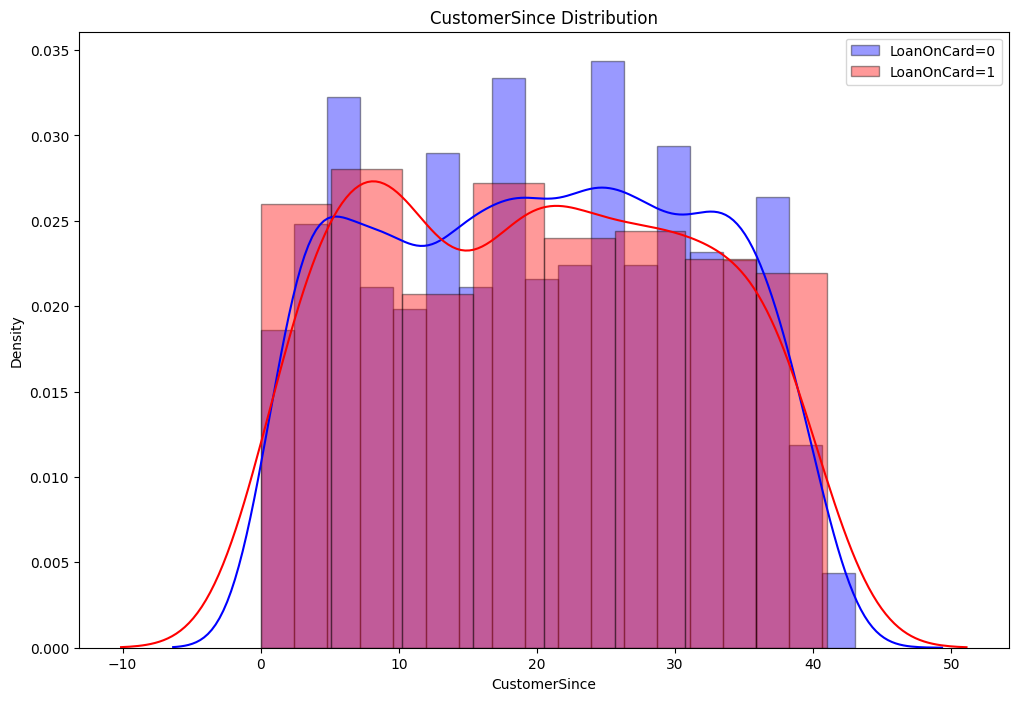

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(data_concat[data_concat['LoanOnCard'] == 0]['CustomerSince'],kde=True, color='b', label='LoanOnCard=0')
sns.distplot(data_concat[data_concat['LoanOnCard'] == 1]['CustomerSince'],kde=True, color='r',label='LoanOnCard=1')
plt.legend()
plt.title("CustomerSince Distribution")

In [ ]:
exp_cut = pd.cut(data_concat['CustomerSince'],bins=[0,10,20,30,40,50])
pd.crosstab(exp_cut,data_concat['LoanOnCard']).apply(lambda r: r/r.sum()*100, axis=1)

LoanOnCard           0.0        1.0
CustomerSince                      
(0, 10]        89.697465  10.302535
(10, 20]       90.582602   9.417398
(20, 30]       90.853190   9.146810
(30, 40]       90.661831   9.338169
(40, 50]       87.037037  12.962963

**Observation : One can observe that out of the total customers with CustomerSince in the range 40-50 show a good conversion rate of almost 13% for buying the LoanOnCard, a healthy conversion rate of about 10.30% in the CustomerSince range 0-10, while in the ranges (10-20), (20-30) and (30-40) years of CustomerSince it is around 9%.**

<u>3. Analyzing the HighestSpend attribute</u>

Text(0.5, 1.0, 'HighestSpend Distribution')

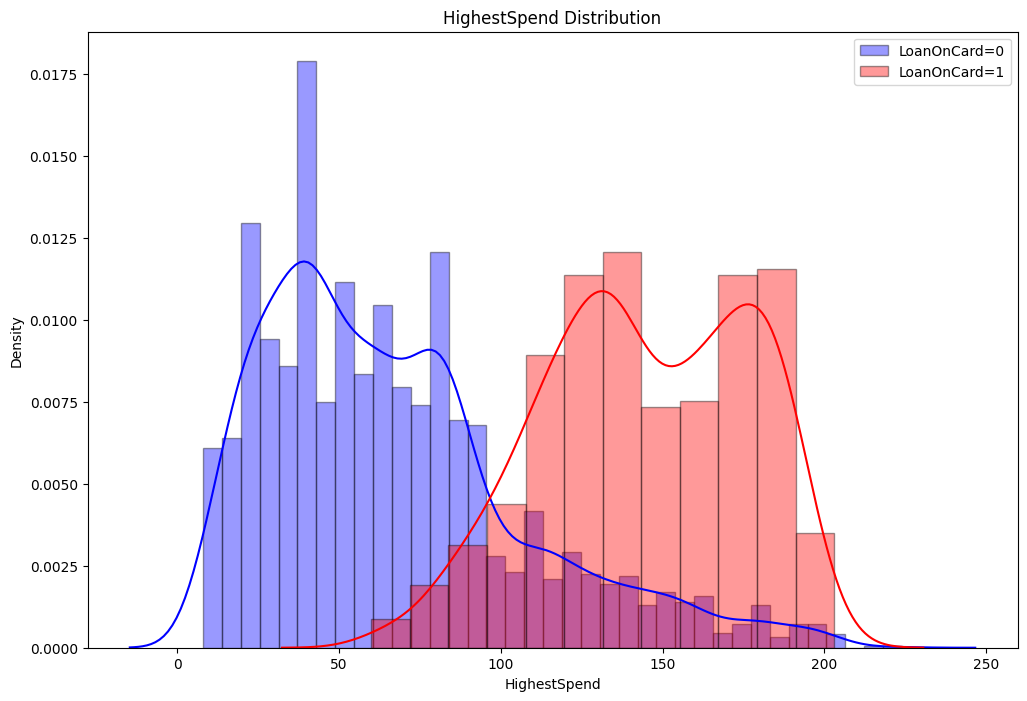

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(data_concat[data_concat['LoanOnCard'] == 0]['HighestSpend'],kde=True, color='b', label='LoanOnCard=0')
sns.distplot(data_concat[data_concat['LoanOnCard'] == 1]['HighestSpend'],kde=True, color='r',label='LoanOnCard=1')
plt.legend()
plt.title("HighestSpend Distribution")

In [ ]:
inc_cut = pd.cut(data_concat['HighestSpend'],bins=[0,50,100,150,200,250])
pd.crosstab(inc_cut,data_concat['LoanOnCard']).apply(lambda r: r/r.sum()*100, axis=1)

LoanOnCard           0.0        1.0
HighestSpend                       
(0, 50]       100.000000   0.000000
(50, 100]      97.758805   2.241195
(100, 150]     71.428571  28.571429
(150, 200]     49.530516  50.469484
(200, 250]     81.250000  18.750000

**Observation : No customer with HighestSpend < 50 units opted for the LoanOnCard where as half of the cutomers with HighestSpend within the range of 150 to 200 units purchased LoanOnCard. Customers within range of (100 to 150) and (200 to 250) units showed a conversion rate of about 28.6% and 18.8%, respectively.**

<u>4. Analyzing the HiddenScore attribute</u>

[Text(0.5, 1.0, 'HiddenScore distribution')]

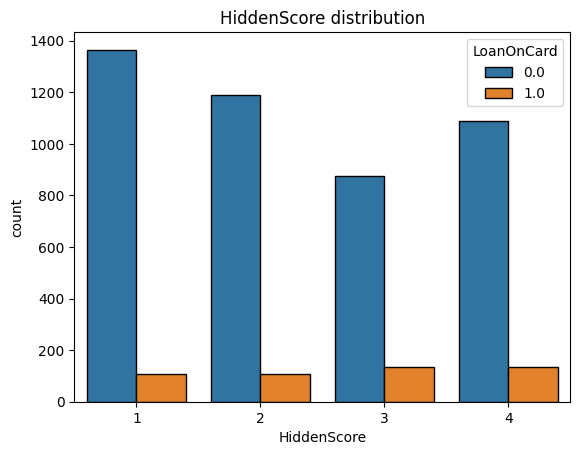

In [ ]:
# Since HiddenScore is an ordinal categorical variable, we will use countplot
sns.countplot(x='HiddenScore',hue='LoanOnCard',data=data_concat).set(title='HiddenScore distribution')

In [ ]:
pd.crosstab(data_concat['HiddenScore'],data_concat['LoanOnCard']).apply(lambda r: r/r.sum()*100, axis=1)

LoanOnCard         0.0        1.0
HiddenScore                      
1            92.730978   7.269022
2            91.820988   8.179012
3            86.831683  13.168317
4            89.034370  10.965630

**Observation : About 13% customers with HiddenScore of 3 and 11% customers with HiddenScore of 4, purchased LoanOnCards from the bank compared to 8% customers with HiddenScore of 2 and 7% customers with HiddenScore of 1.**

<u>5. Analyzing the MonthlyAverageSpend attribute</u>

Text(0.5, 1.0, 'MonthlyAverageSpend Distribution')

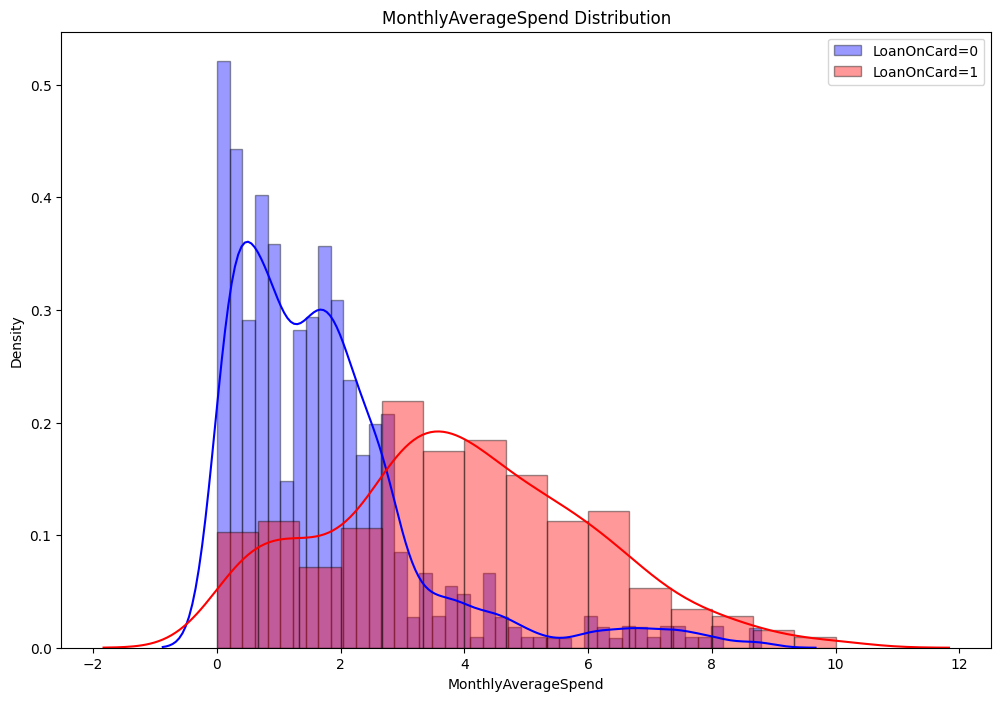

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(data_concat[data_concat['LoanOnCard'] == 0]['MonthlyAverageSpend'],kde=True, color='b', label='LoanOnCard=0')
sns.distplot(data_concat[data_concat['LoanOnCard'] == 1]['MonthlyAverageSpend'],kde=True, color='r',label='LoanOnCard=1')
plt.legend()
plt.title("MonthlyAverageSpend Distribution")

In [ ]:
MonthlyAverageSpend_cut = pd.cut(data_concat['MonthlyAverageSpend'],bins=[0,2,4,6,8,10])
pd.crosstab(MonthlyAverageSpend_cut,data_concat['LoanOnCard']).apply(lambda r: r/r.sum()*100, axis=1)

LoanOnCard                 0.0        1.0
MonthlyAverageSpend                      
(0, 2]               96.975486   3.024514
(2, 4]               86.450540  13.549460
(4, 6]               53.074434  46.925566
(6, 8]               69.306931  30.693069
(8, 10]              64.102564  35.897436

**Observation : One can see from the distribution plot that Customers with more average spending on credit cards per month show more tendancy to buy the LoanOnCards. Thus, MonthlyAverageSpend shows good correlation with Loan on Card. Customers with avg. credit card spending in the range of 4 to 6 units show around 47% conversion rate.**

<u>6. Analyzing the Level attribute</u>

<Axes: xlabel='Level', ylabel='count'>

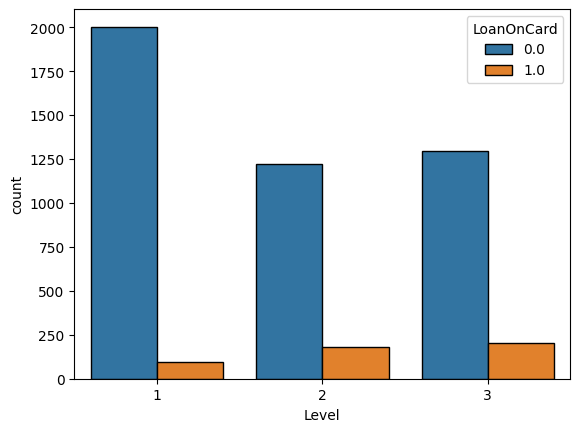

In [ ]:
sns.countplot(data = data_concat, x='Level', hue='LoanOnCard')

In [ ]:
pd.crosstab(data_concat['Level'],data_concat['LoanOnCard']).apply(lambda r: r/r.sum()*100, axis=1)

LoanOnCard        0.0        1.0
Level                           
1           95.562977   4.437023
2           87.027798  12.972202
3           86.342438  13.657562

**Observation : Customers with Levels 2 and 3 show a good conversion rate of about 13% and 13.7%, respectively.**

<u>7. Analyzing the Mortgage attribute</u>

Text(0.5, 1.0, 'Mortgage Distribution')

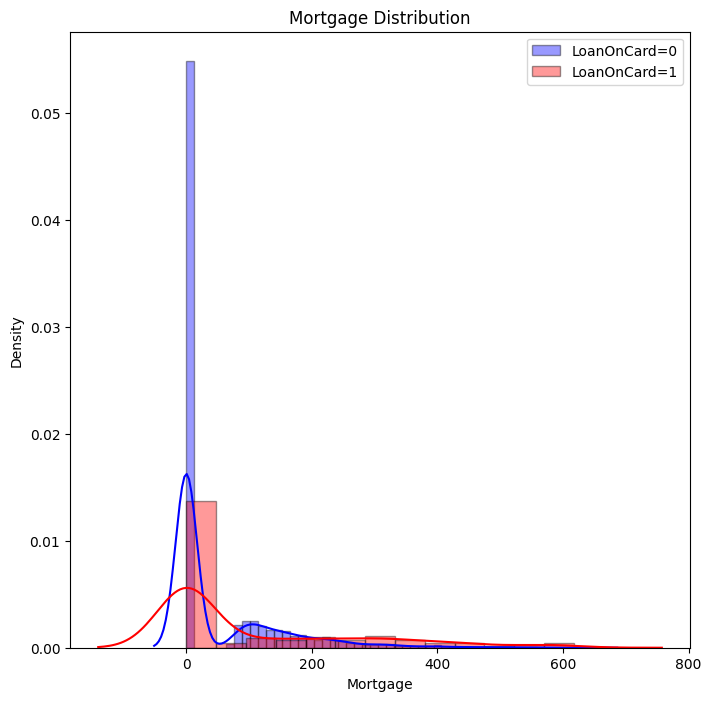

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(data_concat[data_concat['LoanOnCard'] == 0]['Mortgage'],kde=True, color='b', label='LoanOnCard=0')
sns.distplot(data_concat[data_concat['LoanOnCard'] == 1]['Mortgage'],kde=True, color='r',label='LoanOnCard=1')
plt.legend()
plt.title("Mortgage Distribution")

In [ ]:
mort_cut = pd.cut(data_concat['Mortgage'],bins=[0,100,200,300,400,500,600])
pd.crosstab(mort_cut,data_concat['LoanOnCard']).apply(lambda r: r/r.sum()*100, axis=1)

LoanOnCard        0.0        1.0
Mortgage                        
(0, 100]    95.390071   4.609929
(100, 200]  94.854881   5.145119
(200, 300]  86.531987  13.468013
(300, 400]  68.750000  31.250000
(400, 500]  58.333333  41.666667
(500, 600]  33.333333  66.666667

**Observations :**

**1. Customers having house Mortgage value in the ranges (300 to 400), (400 to 500) and (500 to 600) show good tendency to buy the LoanOnCards.**

**2. HighestSpend, MonthlyAverageSpend, Mortgage histograms are not normally distributed**

<u>8. Analyzing the binary attributes Security, FixedDepositAccount, InternetBanking and CreditCard</u>

Since they are nominal variables we will use count plot and box plots for analysis

Text(0.5, 0.9, 'Distribution of binary attributes Security, FixedDepositAccount, InternetBanking and CreditCard')

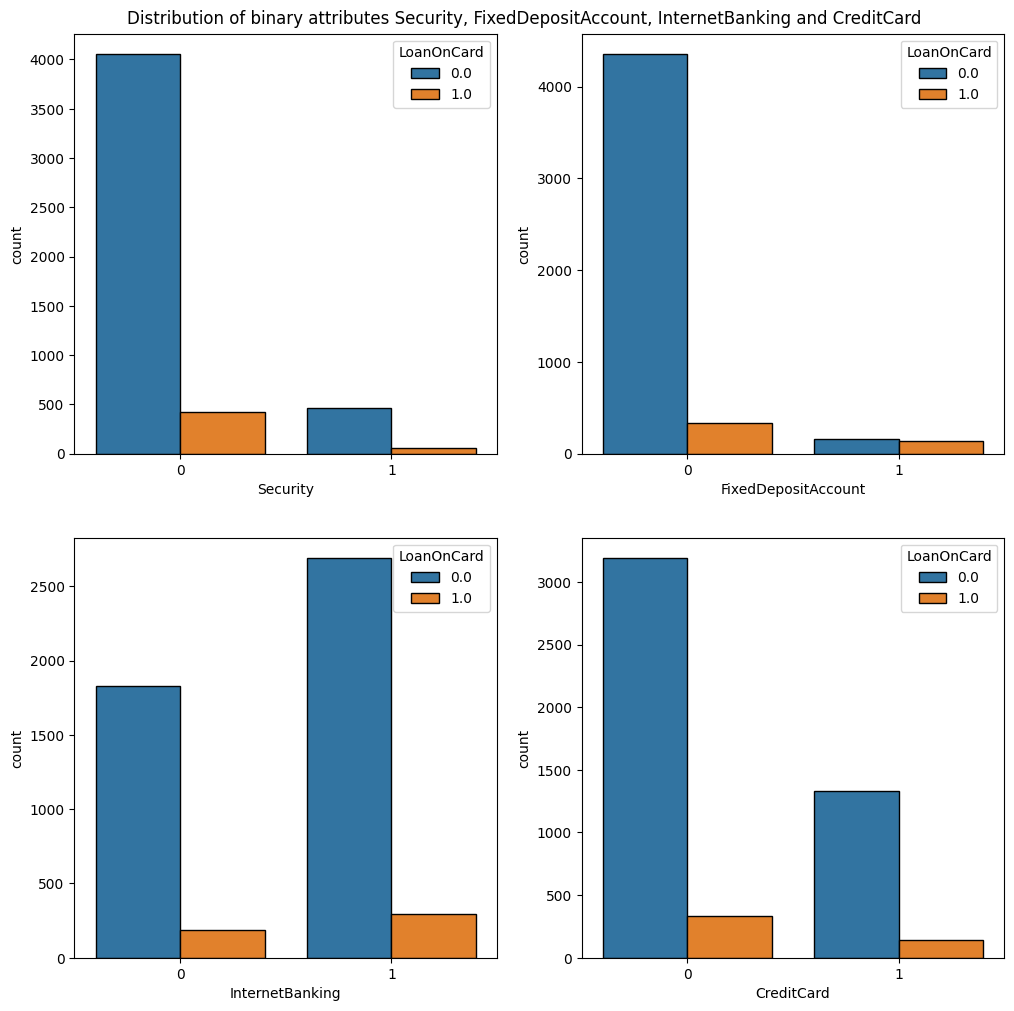

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.countplot(data = data_concat, x='Security', hue='LoanOnCard')
plt.subplot(2,2,2)
sns.countplot(data = data_concat, x='FixedDepositAccount', hue='LoanOnCard')
plt.subplot(2,2,3)
sns.countplot(data = data_concat, x='InternetBanking', hue='LoanOnCard')
plt.subplot(2,2,4)
sns.countplot(data = data_concat, x='CreditCard', hue='LoanOnCard')
plt.suptitle('Distribution of binary attributes Security, FixedDepositAccount, InternetBanking and CreditCard',x=0.5,y=0.90)

In [ ]:
pd.crosstab(data_concat['Security'],data_concat['LoanOnCard']).apply(lambda r: r/r.sum()*100, axis=1)

LoanOnCard        0.0        1.0
Security                        
0           90.620813   9.379187
1           88.505747  11.494253

**Observation : Customers with Security have slightly higher percentage of buying the LoanOnCard than the customers with no Security**

In [ ]:
pd.crosstab(data_concat['FixedDepositAccount'],data_concat['LoanOnCard']).apply(lambda r: r/r.sum()*100, axis=1)

LoanOnCard                 0.0        1.0
FixedDepositAccount                      
0                    92.762878   7.237122
1                    53.642384  46.357616

**Observation : Customers with FixedDepositAccount have very high percentage (46.4%) of buying the LoanOnCard than the customers with no FixedDepositAccount (7.2%)**

In [ ]:
pd.crosstab(data_concat['InternetBanking'],data_concat['LoanOnCard']).apply(lambda r: r/r.sum()*100, axis=1)

LoanOnCard             0.0       1.0
InternetBanking                     
0                90.625000  9.375000
1                90.247989  9.752011

**Observation : InternetBanking has no effect on buying the LoanOnCard as for both kind of customers, who took or didn' take InternetBanking, the percentage of customers who bought LoanonCard  is same, around 9.5%.**

In [ ]:
pd.crosstab(data_concat['CreditCard'],data_concat['LoanOnCard']).apply(lambda r: r/r.sum()*100, axis=1)

LoanOnCard        0.0       1.0
CreditCard                     
0           90.453258  9.546742
1           90.272109  9.727891

**Observation : Similar to InternetBanking attribute, customer using a credit card has no effect on buying the LoanOnCard.**

Text(0.5, 1.05, 'Distribution of Highest Spend for different levels and hiddenscores')

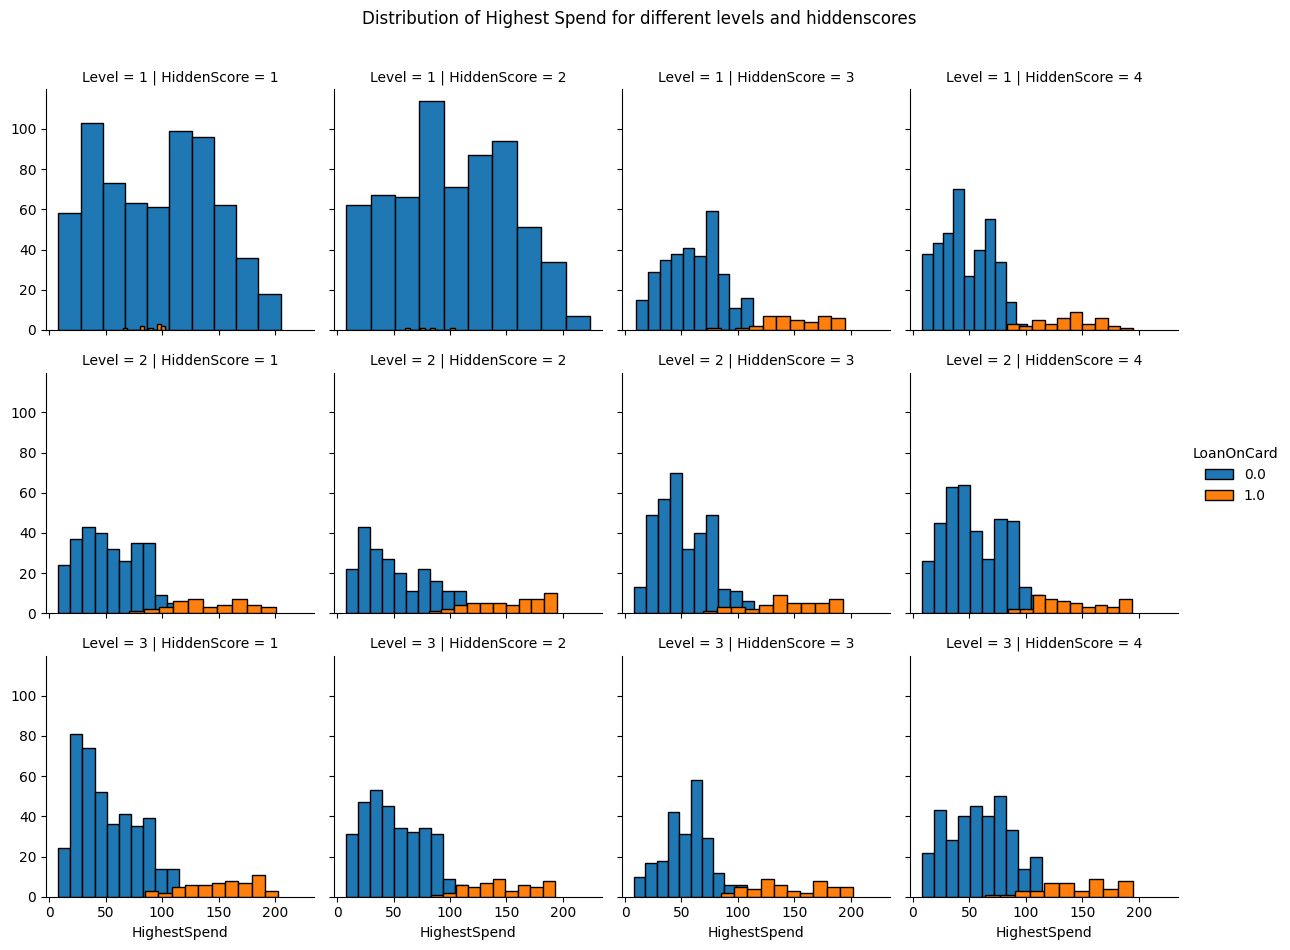

In [ ]:
g=sns.FacetGrid(data=data_concat,row='Level',col='HiddenScore',hue='LoanOnCard').map(plt.hist,'HighestSpend').add_legend()
g.fig.suptitle('Distribution of Highest Spend for different levels and hiddenscores', x= 0.5, y= 1.05)

**Observation : Irrespective of their HighestSpend, Level 1 customer with 1 or 2 HiddenScore generally do not opt for LoanOnCard.**

[Text(0.5, 1.0, 'Box plot of Highest Spend for each level')]

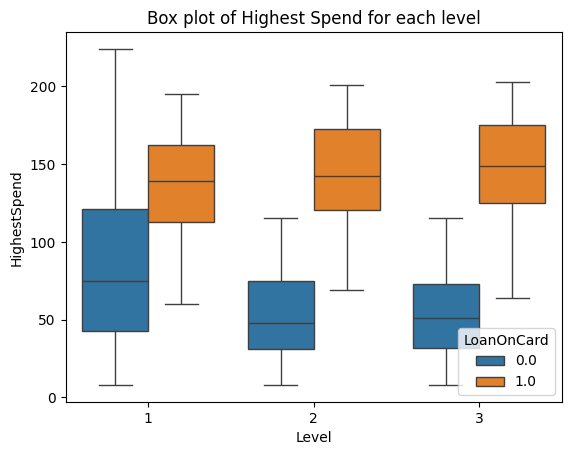

In [ ]:
sns.boxplot(x='Level',y='HighestSpend',hue='LoanOnCard',data=data_concat).set(title='Box plot of Highest Spend for each level')

**Observation : In each Level category, one can see that customers with higher HighestSpend tend to buy LoanOnCard.**

[Text(0.5, 1.0, 'Box plot of Highest Spend for each HiddenScore')]

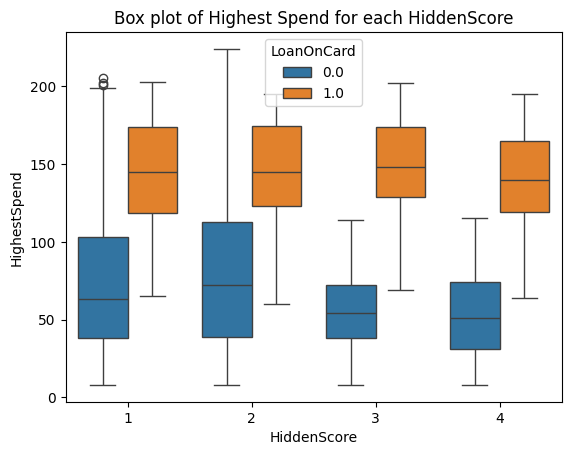

In [ ]:
sns.boxplot(x='HiddenScore',y='HighestSpend',hue='LoanOnCard',data=data_concat).set(title ='Box plot of Highest Spend for each HiddenScore')

**Observation : For customers with HiddenScore of 1,2,3 or 4, higher HighestSpend is an important factor to buy LoanOnCard.**

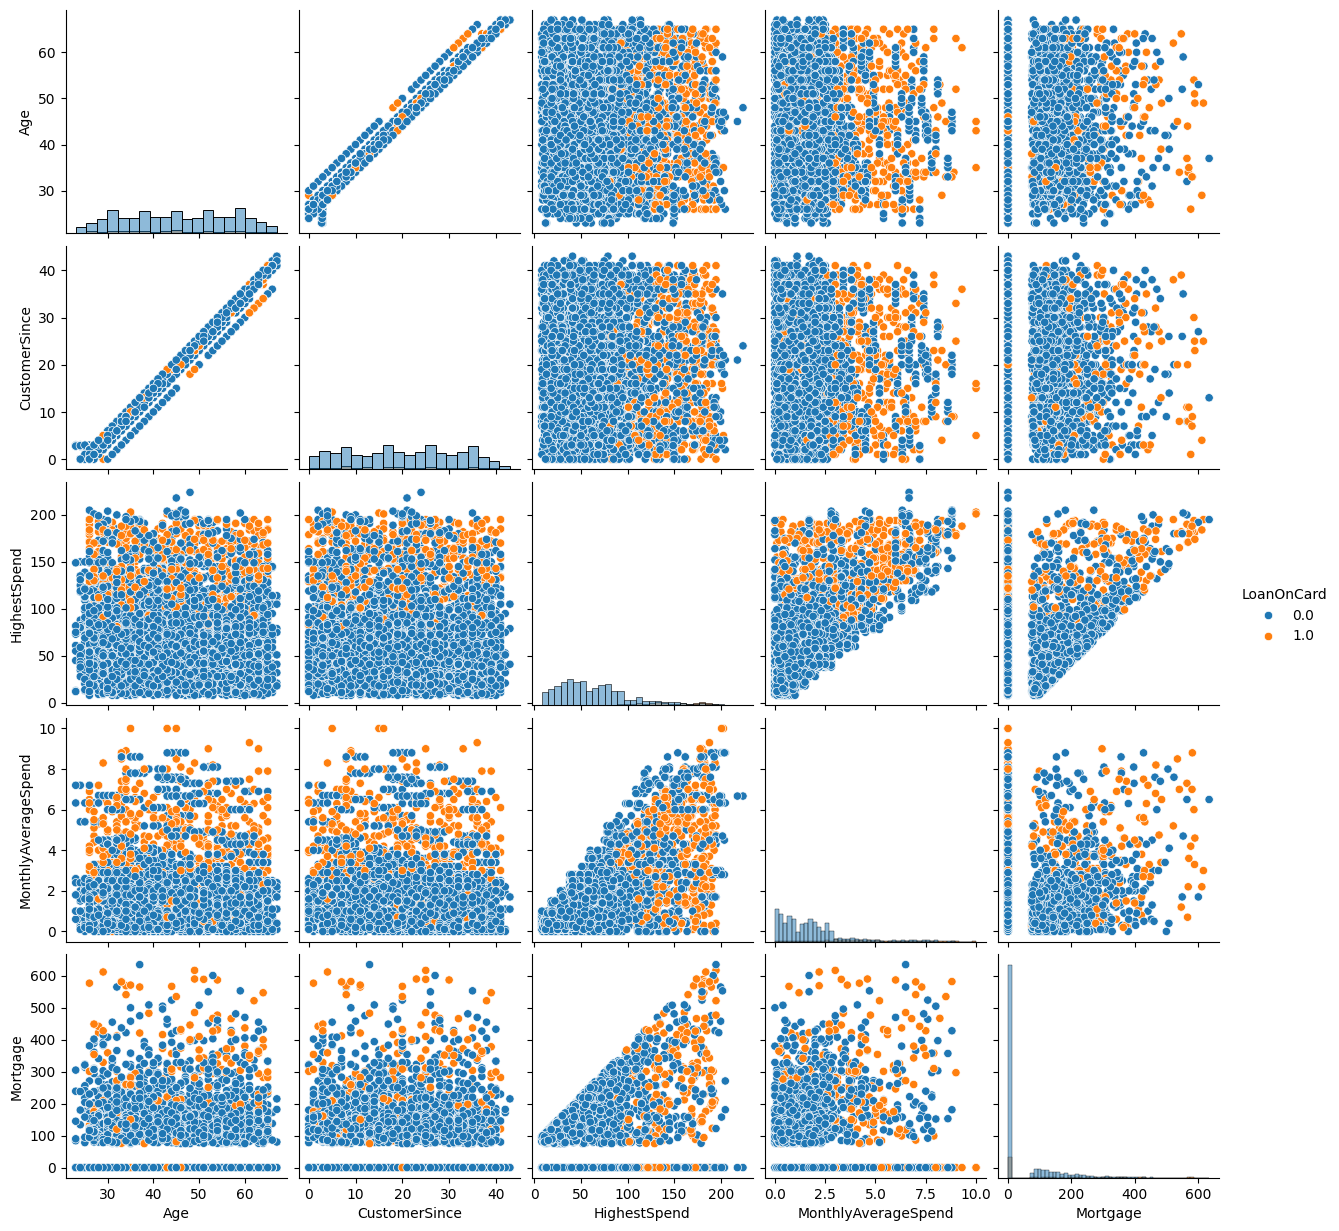

In [ ]:
# pairplot of numerical attributes
sns.pairplot(data_concat[['Age','CustomerSince','HighestSpend','MonthlyAverageSpend', 'Mortgage', 'LoanOnCard']],hue='LoanOnCard',diag_kind='hist')

**Observations :**

**1. Age has a positive linear relationship with CustomerSince.**

**2. No other correlation is observed in other numerical attributes.**